In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python import keras
import seaborn as sns

/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jutraman/opt/anaconda3/envs/mle_tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jutraman/opt/anaco

In [2]:
nursery_data = pd.read_csv('nursery_data.csv', names=["parents","has_nurs","form","children","housing","finance","social","health","class"])
print(nursery_data.isnull())
nursery_data

       parents  has_nurs   form  children  housing  finance  social  health  \
0        False     False  False     False    False    False   False   False   
1        False     False  False     False    False    False   False   False   
2        False     False  False     False    False    False   False   False   
3        False     False  False     False    False    False   False   False   
4        False     False  False     False    False    False   False   False   
...        ...       ...    ...       ...      ...      ...     ...     ...   
12955    False     False  False     False    False    False   False   False   
12956    False     False  False     False    False    False   False   False   
12957    False     False  False     False    False    False   False   False   
12958    False     False  False     False    False    False   False   False   
12959    False     False  False     False    False    False   False   False   

       class  
0      False  
1      False  
2     

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [3]:
#Categorical
features = ["parents","has_nurs","form","children","housing","finance","social","health","class"]
for column in features:
    nursery_data[column] = nursery_data[column].astype("category").cat.codes
nursery_data

,parents,has_nurs,form,children,housing,finance,social,health,class
0,2,3,0,0,0,0,0,2,2
1,2,3,0,0,0,0,0,1,1
2,2,3,0,0,0,0,0,0,0
3,2,3,0,0,0,0,2,2,2
4,2,3,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...
12955,0,4,2,3,1,1,2,1,3
12956,0,4,2,3,1,1,2,0,0
12957,0,4,2,3,1,1,1,2,3
12958,0,4,2,3,1,1,1,1,3


In [4]:
target = ["class"]
X=nursery_data.drop(target,axis=1)
X=np.array(X)
Y=pd.DataFrame(nursery_data[target])
Y=np.array(Y)

In [5]:
model = tf.keras.Sequential([
    keras.layers.Dense(25, input_shape=(8,), activation=tf.nn.tanh),
    keras.layers.Dense(13, activation=tf.nn.tanh),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.3)
model.compile(loss='sparse_categorical_crossentropy',
            optimizer=keras.optimizers.SGD(0.000001),
             metrics=['accuracy'])
history = model.fit(xtrain, ytrain, epochs=10000,validation_split=0.10,verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
Train on 8164 samples, validate on 908 samples
Epoch 1/10000
 - 1s - loss: 1.7216 - acc: 0.1955 - val_loss: 1.6963 - val_acc: 0.2093
Epoch 2/10000
 - 0s - loss: 1.7212 - acc: 0.1957 - val_loss: 1.6959 - val_acc: 0.2093
Epoch 3/10000
 - 0s - loss: 1.7208 - acc: 0.1956 - val_loss: 1.6956 - val_acc: 0.2093
Epoch 4/10000
 - 0s - loss: 1.7204 - acc: 0.1961 - val_loss: 1.6952 - val_acc: 0.2093
Epoch 5/10000
 - 1s - loss: 1.7200 - acc: 0.1966 - val_loss: 1.6948 - val_acc: 0.2104
Epoch 6/10000
 - 0s - loss: 1.7196 - acc: 0.1967 - val_loss: 1.6944 - val_acc: 0.2115
Epoch 7/10000
 - 0s - loss: 1.7192 - acc: 0.1967 - val_loss: 1.6940 - val_acc: 0.2126
Epoch 8/10000
 - 0s - loss: 1.7188 - acc: 0.1967 - val_loss: 1.6936 - val_acc: 0.2126
Epoch 9/10000
 - 0s - loss: 1.7184 - acc: 0.1972 - val_loss: 1.6932 - val_acc: 0.2137
Epoch 10/10000
 - 0s - loss: 1.7181 - acc: 0.1972 - val_loss: 1.6928 - val_acc: 0.2137
Epoch 11/10000
 - 0s

Epoch 91/10000
 - 0s - loss: 1.6870 - acc: 0.2125 - val_loss: 1.6627 - val_acc: 0.2291
Epoch 92/10000
 - 0s - loss: 1.6867 - acc: 0.2126 - val_loss: 1.6623 - val_acc: 0.2291
Epoch 93/10000
 - 0s - loss: 1.6863 - acc: 0.2128 - val_loss: 1.6619 - val_acc: 0.2291
Epoch 94/10000
 - 0s - loss: 1.6859 - acc: 0.2130 - val_loss: 1.6616 - val_acc: 0.2291
Epoch 95/10000
 - 0s - loss: 1.6856 - acc: 0.2133 - val_loss: 1.6612 - val_acc: 0.2291
Epoch 96/10000
 - 0s - loss: 1.6852 - acc: 0.2135 - val_loss: 1.6609 - val_acc: 0.2291
Epoch 97/10000
 - 0s - loss: 1.6848 - acc: 0.2136 - val_loss: 1.6605 - val_acc: 0.2291
Epoch 98/10000
 - 0s - loss: 1.6845 - acc: 0.2136 - val_loss: 1.6601 - val_acc: 0.2302
Epoch 99/10000
 - 0s - loss: 1.6841 - acc: 0.2137 - val_loss: 1.6598 - val_acc: 0.2302
Epoch 100/10000
 - 0s - loss: 1.6837 - acc: 0.2137 - val_loss: 1.6594 - val_acc: 0.2302
Epoch 101/10000
 - 0s - loss: 1.6834 - acc: 0.2137 - val_loss: 1.6591 - val_acc: 0.2302
Epoch 102/10000
 - 0s - loss: 1.6830 - ac

Epoch 185/10000
 - 0s - loss: 1.6537 - acc: 0.2283 - val_loss: 1.6303 - val_acc: 0.2489
Epoch 186/10000
 - 0s - loss: 1.6534 - acc: 0.2284 - val_loss: 1.6299 - val_acc: 0.2489
Epoch 187/10000
 - 0s - loss: 1.6530 - acc: 0.2286 - val_loss: 1.6296 - val_acc: 0.2489
Epoch 188/10000
 - 0s - loss: 1.6527 - acc: 0.2286 - val_loss: 1.6293 - val_acc: 0.2489
Epoch 189/10000
 - 0s - loss: 1.6524 - acc: 0.2287 - val_loss: 1.6289 - val_acc: 0.2489
Epoch 190/10000
 - 0s - loss: 1.6520 - acc: 0.2289 - val_loss: 1.6286 - val_acc: 0.2489
Epoch 191/10000
 - 0s - loss: 1.6517 - acc: 0.2293 - val_loss: 1.6283 - val_acc: 0.2511
Epoch 192/10000
 - 0s - loss: 1.6513 - acc: 0.2294 - val_loss: 1.6279 - val_acc: 0.2511
Epoch 193/10000
 - 0s - loss: 1.6510 - acc: 0.2293 - val_loss: 1.6276 - val_acc: 0.2511
Epoch 194/10000
 - 0s - loss: 1.6507 - acc: 0.2295 - val_loss: 1.6273 - val_acc: 0.2511
Epoch 195/10000
 - 0s - loss: 1.6503 - acc: 0.2298 - val_loss: 1.6270 - val_acc: 0.2511
Epoch 196/10000
 - 0s - loss: 1.

 - 0s - loss: 1.6232 - acc: 0.2444 - val_loss: 1.6007 - val_acc: 0.2654
Epoch 279/10000
 - 0s - loss: 1.6229 - acc: 0.2447 - val_loss: 1.6004 - val_acc: 0.2654
Epoch 280/10000
 - 0s - loss: 1.6226 - acc: 0.2449 - val_loss: 1.6001 - val_acc: 0.2665
Epoch 281/10000
 - 0s - loss: 1.6223 - acc: 0.2451 - val_loss: 1.5998 - val_acc: 0.2665
Epoch 282/10000
 - 0s - loss: 1.6220 - acc: 0.2455 - val_loss: 1.5995 - val_acc: 0.2665
Epoch 283/10000
 - 0s - loss: 1.6217 - acc: 0.2461 - val_loss: 1.5992 - val_acc: 0.2676
Epoch 284/10000
 - 0s - loss: 1.6214 - acc: 0.2466 - val_loss: 1.5989 - val_acc: 0.2676
Epoch 285/10000
 - 0s - loss: 1.6210 - acc: 0.2469 - val_loss: 1.5985 - val_acc: 0.2676
Epoch 286/10000
 - 0s - loss: 1.6207 - acc: 0.2471 - val_loss: 1.5982 - val_acc: 0.2676
Epoch 287/10000
 - 0s - loss: 1.6204 - acc: 0.2472 - val_loss: 1.5979 - val_acc: 0.2676
Epoch 288/10000
 - 0s - loss: 1.6201 - acc: 0.2474 - val_loss: 1.5976 - val_acc: 0.2676
Epoch 289/10000
 - 0s - loss: 1.6198 - acc: 0.24

Epoch 372/10000
 - 0s - loss: 1.5947 - acc: 0.2604 - val_loss: 1.5730 - val_acc: 0.2808
Epoch 373/10000
 - 0s - loss: 1.5944 - acc: 0.2605 - val_loss: 1.5727 - val_acc: 0.2819
Epoch 374/10000
 - 0s - loss: 1.5942 - acc: 0.2609 - val_loss: 1.5725 - val_acc: 0.2819
Epoch 375/10000
 - 0s - loss: 1.5939 - acc: 0.2611 - val_loss: 1.5722 - val_acc: 0.2819
Epoch 376/10000
 - 0s - loss: 1.5936 - acc: 0.2616 - val_loss: 1.5719 - val_acc: 0.2819
Epoch 377/10000
 - 0s - loss: 1.5933 - acc: 0.2618 - val_loss: 1.5716 - val_acc: 0.2819
Epoch 378/10000
 - 0s - loss: 1.5930 - acc: 0.2620 - val_loss: 1.5713 - val_acc: 0.2819
Epoch 379/10000
 - 0s - loss: 1.5927 - acc: 0.2624 - val_loss: 1.5711 - val_acc: 0.2819
Epoch 380/10000
 - 0s - loss: 1.5924 - acc: 0.2625 - val_loss: 1.5708 - val_acc: 0.2819
Epoch 381/10000
 - 0s - loss: 1.5921 - acc: 0.2626 - val_loss: 1.5705 - val_acc: 0.2819
Epoch 382/10000
 - 0s - loss: 1.5918 - acc: 0.2632 - val_loss: 1.5702 - val_acc: 0.2819
Epoch 383/10000
 - 0s - loss: 1.

 - 0s - loss: 1.5686 - acc: 0.2783 - val_loss: 1.5477 - val_acc: 0.2896
Epoch 466/10000
 - 0s - loss: 1.5683 - acc: 0.2783 - val_loss: 1.5474 - val_acc: 0.2896
Epoch 467/10000
 - 0s - loss: 1.5680 - acc: 0.2784 - val_loss: 1.5471 - val_acc: 0.2896
Epoch 468/10000
 - 0s - loss: 1.5678 - acc: 0.2783 - val_loss: 1.5469 - val_acc: 0.2896
Epoch 469/10000
 - 0s - loss: 1.5675 - acc: 0.2783 - val_loss: 1.5466 - val_acc: 0.2896
Epoch 470/10000
 - 0s - loss: 1.5672 - acc: 0.2789 - val_loss: 1.5464 - val_acc: 0.2896
Epoch 471/10000
 - 0s - loss: 1.5669 - acc: 0.2790 - val_loss: 1.5461 - val_acc: 0.2896
Epoch 472/10000
 - 0s - loss: 1.5667 - acc: 0.2789 - val_loss: 1.5458 - val_acc: 0.2896
Epoch 473/10000
 - 0s - loss: 1.5664 - acc: 0.2793 - val_loss: 1.5456 - val_acc: 0.2896
Epoch 474/10000
 - 0s - loss: 1.5661 - acc: 0.2793 - val_loss: 1.5453 - val_acc: 0.2896
Epoch 475/10000
 - 0s - loss: 1.5659 - acc: 0.2795 - val_loss: 1.5451 - val_acc: 0.2896
Epoch 476/10000
 - 0s - loss: 1.5656 - acc: 0.27

Epoch 559/10000
 - 0s - loss: 1.5440 - acc: 0.2924 - val_loss: 1.5239 - val_acc: 0.3084
Epoch 560/10000
 - 0s - loss: 1.5437 - acc: 0.2925 - val_loss: 1.5236 - val_acc: 0.3084
Epoch 561/10000
 - 0s - loss: 1.5435 - acc: 0.2930 - val_loss: 1.5234 - val_acc: 0.3084
Epoch 562/10000
 - 0s - loss: 1.5432 - acc: 0.2935 - val_loss: 1.5231 - val_acc: 0.3084
Epoch 563/10000
 - 0s - loss: 1.5430 - acc: 0.2936 - val_loss: 1.5229 - val_acc: 0.3084
Epoch 564/10000
 - 0s - loss: 1.5427 - acc: 0.2937 - val_loss: 1.5226 - val_acc: 0.3084
Epoch 565/10000
 - 0s - loss: 1.5425 - acc: 0.2939 - val_loss: 1.5224 - val_acc: 0.3084
Epoch 566/10000
 - 0s - loss: 1.5422 - acc: 0.2939 - val_loss: 1.5221 - val_acc: 0.3084
Epoch 567/10000
 - 0s - loss: 1.5420 - acc: 0.2939 - val_loss: 1.5219 - val_acc: 0.3084
Epoch 568/10000
 - 0s - loss: 1.5417 - acc: 0.2940 - val_loss: 1.5217 - val_acc: 0.3084
Epoch 569/10000
 - 0s - loss: 1.5415 - acc: 0.2942 - val_loss: 1.5214 - val_acc: 0.3095
Epoch 570/10000
 - 0s - loss: 1.

 - 0s - loss: 1.5213 - acc: 0.3071 - val_loss: 1.5019 - val_acc: 0.3172
Epoch 653/10000
 - 0s - loss: 1.5211 - acc: 0.3071 - val_loss: 1.5017 - val_acc: 0.3172
Epoch 654/10000
 - 0s - loss: 1.5209 - acc: 0.3071 - val_loss: 1.5015 - val_acc: 0.3172
Epoch 655/10000
 - 0s - loss: 1.5206 - acc: 0.3072 - val_loss: 1.5012 - val_acc: 0.3172
Epoch 656/10000
 - 0s - loss: 1.5204 - acc: 0.3074 - val_loss: 1.5010 - val_acc: 0.3172
Epoch 657/10000
 - 0s - loss: 1.5201 - acc: 0.3074 - val_loss: 1.5008 - val_acc: 0.3172
Epoch 658/10000
 - 0s - loss: 1.5199 - acc: 0.3078 - val_loss: 1.5006 - val_acc: 0.3172
Epoch 659/10000
 - 0s - loss: 1.5197 - acc: 0.3083 - val_loss: 1.5003 - val_acc: 0.3172
Epoch 660/10000
 - 0s - loss: 1.5194 - acc: 0.3083 - val_loss: 1.5001 - val_acc: 0.3172
Epoch 661/10000
 - 0s - loss: 1.5192 - acc: 0.3084 - val_loss: 1.4999 - val_acc: 0.3172
Epoch 662/10000
 - 0s - loss: 1.5190 - acc: 0.3085 - val_loss: 1.4997 - val_acc: 0.3183
Epoch 663/10000
 - 0s - loss: 1.5187 - acc: 0.30

Epoch 746/10000
 - 0s - loss: 1.5000 - acc: 0.3183 - val_loss: 1.4812 - val_acc: 0.3293
Epoch 747/10000
 - 0s - loss: 1.4997 - acc: 0.3183 - val_loss: 1.4810 - val_acc: 0.3293
Epoch 748/10000
 - 0s - loss: 1.4995 - acc: 0.3185 - val_loss: 1.4808 - val_acc: 0.3293
Epoch 749/10000
 - 0s - loss: 1.4993 - acc: 0.3187 - val_loss: 1.4806 - val_acc: 0.3293
Epoch 750/10000
 - 0s - loss: 1.4991 - acc: 0.3188 - val_loss: 1.4804 - val_acc: 0.3293
Epoch 751/10000
 - 0s - loss: 1.4989 - acc: 0.3191 - val_loss: 1.4802 - val_acc: 0.3293
Epoch 752/10000
 - 0s - loss: 1.4986 - acc: 0.3191 - val_loss: 1.4800 - val_acc: 0.3293
Epoch 753/10000
 - 0s - loss: 1.4984 - acc: 0.3191 - val_loss: 1.4798 - val_acc: 0.3293
Epoch 754/10000
 - 0s - loss: 1.4982 - acc: 0.3191 - val_loss: 1.4795 - val_acc: 0.3293
Epoch 755/10000
 - 0s - loss: 1.4980 - acc: 0.3195 - val_loss: 1.4793 - val_acc: 0.3293
Epoch 756/10000
 - 0s - loss: 1.4978 - acc: 0.3196 - val_loss: 1.4791 - val_acc: 0.3293
Epoch 757/10000
 - 0s - loss: 1.

 - 0s - loss: 1.4802 - acc: 0.3324 - val_loss: 1.4621 - val_acc: 0.3425
Epoch 840/10000
 - 0s - loss: 1.4800 - acc: 0.3329 - val_loss: 1.4619 - val_acc: 0.3425
Epoch 841/10000
 - 0s - loss: 1.4798 - acc: 0.3332 - val_loss: 1.4617 - val_acc: 0.3425
Epoch 842/10000
 - 0s - loss: 1.4796 - acc: 0.3333 - val_loss: 1.4615 - val_acc: 0.3425
Epoch 843/10000
 - 0s - loss: 1.4794 - acc: 0.3334 - val_loss: 1.4613 - val_acc: 0.3425
Epoch 844/10000
 - 0s - loss: 1.4792 - acc: 0.3334 - val_loss: 1.4611 - val_acc: 0.3425
Epoch 845/10000
 - 0s - loss: 1.4790 - acc: 0.3337 - val_loss: 1.4609 - val_acc: 0.3425
Epoch 846/10000
 - 0s - loss: 1.4788 - acc: 0.3335 - val_loss: 1.4607 - val_acc: 0.3414
Epoch 847/10000
 - 0s - loss: 1.4786 - acc: 0.3337 - val_loss: 1.4605 - val_acc: 0.3414
Epoch 848/10000
 - 0s - loss: 1.4784 - acc: 0.3337 - val_loss: 1.4603 - val_acc: 0.3425
Epoch 849/10000
 - 0s - loss: 1.4782 - acc: 0.3339 - val_loss: 1.4601 - val_acc: 0.3425
Epoch 850/10000
 - 0s - loss: 1.4780 - acc: 0.33

Epoch 933/10000
 - 0s - loss: 1.4615 - acc: 0.3415 - val_loss: 1.4440 - val_acc: 0.3502
Epoch 934/10000
 - 0s - loss: 1.4613 - acc: 0.3415 - val_loss: 1.4438 - val_acc: 0.3502
Epoch 935/10000
 - 0s - loss: 1.4611 - acc: 0.3415 - val_loss: 1.4436 - val_acc: 0.3502
Epoch 936/10000
 - 0s - loss: 1.4609 - acc: 0.3416 - val_loss: 1.4435 - val_acc: 0.3502
Epoch 937/10000
 - 0s - loss: 1.4607 - acc: 0.3417 - val_loss: 1.4433 - val_acc: 0.3524
Epoch 938/10000
 - 0s - loss: 1.4605 - acc: 0.3417 - val_loss: 1.4431 - val_acc: 0.3524
Epoch 939/10000
 - 0s - loss: 1.4604 - acc: 0.3419 - val_loss: 1.4429 - val_acc: 0.3524
Epoch 940/10000
 - 0s - loss: 1.4602 - acc: 0.3416 - val_loss: 1.4427 - val_acc: 0.3524
Epoch 941/10000
 - 0s - loss: 1.4600 - acc: 0.3417 - val_loss: 1.4425 - val_acc: 0.3524
Epoch 942/10000
 - 0s - loss: 1.4598 - acc: 0.3417 - val_loss: 1.4423 - val_acc: 0.3535
Epoch 943/10000
 - 0s - loss: 1.4596 - acc: 0.3417 - val_loss: 1.4422 - val_acc: 0.3535
Epoch 944/10000
 - 0s - loss: 1.

Epoch 1026/10000
 - 0s - loss: 1.4442 - acc: 0.3480 - val_loss: 1.4272 - val_acc: 0.3590
Epoch 1027/10000
 - 0s - loss: 1.4440 - acc: 0.3480 - val_loss: 1.4270 - val_acc: 0.3590
Epoch 1028/10000
 - 0s - loss: 1.4438 - acc: 0.3480 - val_loss: 1.4269 - val_acc: 0.3590
Epoch 1029/10000
 - 0s - loss: 1.4436 - acc: 0.3484 - val_loss: 1.4267 - val_acc: 0.3590
Epoch 1030/10000
 - 0s - loss: 1.4434 - acc: 0.3485 - val_loss: 1.4265 - val_acc: 0.3590
Epoch 1031/10000
 - 0s - loss: 1.4432 - acc: 0.3487 - val_loss: 1.4263 - val_acc: 0.3590
Epoch 1032/10000
 - 0s - loss: 1.4431 - acc: 0.3487 - val_loss: 1.4262 - val_acc: 0.3590
Epoch 1033/10000
 - 0s - loss: 1.4429 - acc: 0.3488 - val_loss: 1.4260 - val_acc: 0.3590
Epoch 1034/10000
 - 0s - loss: 1.4427 - acc: 0.3490 - val_loss: 1.4258 - val_acc: 0.3590
Epoch 1035/10000
 - 0s - loss: 1.4425 - acc: 0.3491 - val_loss: 1.4256 - val_acc: 0.3590
Epoch 1036/10000
 - 0s - loss: 1.4424 - acc: 0.3492 - val_loss: 1.4255 - val_acc: 0.3590
Epoch 1037/10000
 - 0

 - 0s - loss: 1.4280 - acc: 0.3556 - val_loss: 1.4116 - val_acc: 0.3689
Epoch 1119/10000
 - 0s - loss: 1.4278 - acc: 0.3560 - val_loss: 1.4114 - val_acc: 0.3689
Epoch 1120/10000
 - 0s - loss: 1.4277 - acc: 0.3563 - val_loss: 1.4112 - val_acc: 0.3689
Epoch 1121/10000
 - 0s - loss: 1.4275 - acc: 0.3562 - val_loss: 1.4111 - val_acc: 0.3689
Epoch 1122/10000
 - 0s - loss: 1.4273 - acc: 0.3562 - val_loss: 1.4109 - val_acc: 0.3689
Epoch 1123/10000
 - 0s - loss: 1.4272 - acc: 0.3562 - val_loss: 1.4107 - val_acc: 0.3689
Epoch 1124/10000
 - 0s - loss: 1.4270 - acc: 0.3563 - val_loss: 1.4106 - val_acc: 0.3689
Epoch 1125/10000
 - 0s - loss: 1.4268 - acc: 0.3566 - val_loss: 1.4104 - val_acc: 0.3689
Epoch 1126/10000
 - 0s - loss: 1.4266 - acc: 0.3569 - val_loss: 1.4102 - val_acc: 0.3689
Epoch 1127/10000
 - 0s - loss: 1.4265 - acc: 0.3568 - val_loss: 1.4101 - val_acc: 0.3689
Epoch 1128/10000
 - 0s - loss: 1.4263 - acc: 0.3572 - val_loss: 1.4099 - val_acc: 0.3689
Epoch 1129/10000
 - 0s - loss: 1.4261 

Epoch 1211/10000
 - 0s - loss: 1.4126 - acc: 0.3631 - val_loss: 1.3966 - val_acc: 0.3756
Epoch 1212/10000
 - 0s - loss: 1.4125 - acc: 0.3633 - val_loss: 1.3965 - val_acc: 0.3756
Epoch 1213/10000
 - 0s - loss: 1.4123 - acc: 0.3634 - val_loss: 1.3963 - val_acc: 0.3756
Epoch 1214/10000
 - 0s - loss: 1.4121 - acc: 0.3634 - val_loss: 1.3962 - val_acc: 0.3756
Epoch 1215/10000
 - 0s - loss: 1.4120 - acc: 0.3634 - val_loss: 1.3960 - val_acc: 0.3767
Epoch 1216/10000
 - 0s - loss: 1.4118 - acc: 0.3633 - val_loss: 1.3959 - val_acc: 0.3767
Epoch 1217/10000
 - 0s - loss: 1.4117 - acc: 0.3633 - val_loss: 1.3957 - val_acc: 0.3767
Epoch 1218/10000
 - 0s - loss: 1.4115 - acc: 0.3633 - val_loss: 1.3956 - val_acc: 0.3767
Epoch 1219/10000
 - 0s - loss: 1.4113 - acc: 0.3634 - val_loss: 1.3954 - val_acc: 0.3767
Epoch 1220/10000
 - 0s - loss: 1.4112 - acc: 0.3637 - val_loss: 1.3952 - val_acc: 0.3767
Epoch 1221/10000
 - 0s - loss: 1.4110 - acc: 0.3637 - val_loss: 1.3951 - val_acc: 0.3756
Epoch 1222/10000
 - 0

 - 0s - loss: 1.3982 - acc: 0.3695 - val_loss: 1.3827 - val_acc: 0.3800
Epoch 1304/10000
 - 0s - loss: 1.3981 - acc: 0.3697 - val_loss: 1.3826 - val_acc: 0.3800
Epoch 1305/10000
 - 0s - loss: 1.3979 - acc: 0.3697 - val_loss: 1.3824 - val_acc: 0.3800
Epoch 1306/10000
 - 0s - loss: 1.3978 - acc: 0.3699 - val_loss: 1.3823 - val_acc: 0.3800
Epoch 1307/10000
 - 0s - loss: 1.3976 - acc: 0.3699 - val_loss: 1.3821 - val_acc: 0.3800
Epoch 1308/10000
 - 0s - loss: 1.3975 - acc: 0.3699 - val_loss: 1.3820 - val_acc: 0.3800
Epoch 1309/10000
 - 0s - loss: 1.3973 - acc: 0.3702 - val_loss: 1.3818 - val_acc: 0.3800
Epoch 1310/10000
 - 0s - loss: 1.3972 - acc: 0.3702 - val_loss: 1.3817 - val_acc: 0.3800
Epoch 1311/10000
 - 0s - loss: 1.3970 - acc: 0.3703 - val_loss: 1.3815 - val_acc: 0.3800
Epoch 1312/10000
 - 0s - loss: 1.3969 - acc: 0.3704 - val_loss: 1.3814 - val_acc: 0.3800
Epoch 1313/10000
 - 0s - loss: 1.3967 - acc: 0.3709 - val_loss: 1.3812 - val_acc: 0.3800
Epoch 1314/10000
 - 0s - loss: 1.3966 

Epoch 1396/10000
 - 0s - loss: 1.3845 - acc: 0.3743 - val_loss: 1.3694 - val_acc: 0.3833
Epoch 1397/10000
 - 0s - loss: 1.3844 - acc: 0.3743 - val_loss: 1.3692 - val_acc: 0.3844
Epoch 1398/10000
 - 0s - loss: 1.3842 - acc: 0.3743 - val_loss: 1.3691 - val_acc: 0.3844
Epoch 1399/10000
 - 0s - loss: 1.3841 - acc: 0.3743 - val_loss: 1.3689 - val_acc: 0.3844
Epoch 1400/10000
 - 0s - loss: 1.3839 - acc: 0.3743 - val_loss: 1.3688 - val_acc: 0.3844
Epoch 1401/10000
 - 0s - loss: 1.3838 - acc: 0.3746 - val_loss: 1.3687 - val_acc: 0.3844
Epoch 1402/10000
 - 0s - loss: 1.3836 - acc: 0.3746 - val_loss: 1.3685 - val_acc: 0.3844
Epoch 1403/10000
 - 0s - loss: 1.3835 - acc: 0.3747 - val_loss: 1.3684 - val_acc: 0.3844
Epoch 1404/10000
 - 0s - loss: 1.3833 - acc: 0.3747 - val_loss: 1.3682 - val_acc: 0.3844
Epoch 1405/10000
 - 0s - loss: 1.3832 - acc: 0.3748 - val_loss: 1.3681 - val_acc: 0.3844
Epoch 1406/10000
 - 0s - loss: 1.3831 - acc: 0.3749 - val_loss: 1.3680 - val_acc: 0.3844
Epoch 1407/10000
 - 0

 - 0s - loss: 1.3716 - acc: 0.3792 - val_loss: 1.3568 - val_acc: 0.3899
Epoch 1489/10000
 - 0s - loss: 1.3715 - acc: 0.3791 - val_loss: 1.3567 - val_acc: 0.3899
Epoch 1490/10000
 - 0s - loss: 1.3713 - acc: 0.3791 - val_loss: 1.3566 - val_acc: 0.3899
Epoch 1491/10000
 - 0s - loss: 1.3712 - acc: 0.3790 - val_loss: 1.3564 - val_acc: 0.3899
Epoch 1492/10000
 - 0s - loss: 1.3710 - acc: 0.3790 - val_loss: 1.3563 - val_acc: 0.3899
Epoch 1493/10000
 - 0s - loss: 1.3709 - acc: 0.3790 - val_loss: 1.3562 - val_acc: 0.3899
Epoch 1494/10000
 - 0s - loss: 1.3708 - acc: 0.3791 - val_loss: 1.3560 - val_acc: 0.3899
Epoch 1495/10000
 - 0s - loss: 1.3706 - acc: 0.3791 - val_loss: 1.3559 - val_acc: 0.3910
Epoch 1496/10000
 - 0s - loss: 1.3705 - acc: 0.3791 - val_loss: 1.3558 - val_acc: 0.3910
Epoch 1497/10000
 - 0s - loss: 1.3704 - acc: 0.3791 - val_loss: 1.3556 - val_acc: 0.3899
Epoch 1498/10000
 - 0s - loss: 1.3702 - acc: 0.3791 - val_loss: 1.3555 - val_acc: 0.3899
Epoch 1499/10000
 - 0s - loss: 1.3701 

Epoch 1581/10000
 - 0s - loss: 1.3592 - acc: 0.3838 - val_loss: 1.3448 - val_acc: 0.3965
Epoch 1582/10000
 - 0s - loss: 1.3591 - acc: 0.3839 - val_loss: 1.3447 - val_acc: 0.3965
Epoch 1583/10000
 - 0s - loss: 1.3589 - acc: 0.3839 - val_loss: 1.3445 - val_acc: 0.3965
Epoch 1584/10000
 - 0s - loss: 1.3588 - acc: 0.3840 - val_loss: 1.3444 - val_acc: 0.3965
Epoch 1585/10000
 - 0s - loss: 1.3587 - acc: 0.3841 - val_loss: 1.3443 - val_acc: 0.3965
Epoch 1586/10000
 - 0s - loss: 1.3585 - acc: 0.3841 - val_loss: 1.3442 - val_acc: 0.3965
Epoch 1587/10000
 - 0s - loss: 1.3584 - acc: 0.3841 - val_loss: 1.3440 - val_acc: 0.3965
Epoch 1588/10000
 - 0s - loss: 1.3583 - acc: 0.3842 - val_loss: 1.3439 - val_acc: 0.3965
Epoch 1589/10000
 - 0s - loss: 1.3582 - acc: 0.3842 - val_loss: 1.3438 - val_acc: 0.3965
Epoch 1590/10000
 - 0s - loss: 1.3580 - acc: 0.3844 - val_loss: 1.3437 - val_acc: 0.3965
Epoch 1591/10000
 - 0s - loss: 1.3579 - acc: 0.3844 - val_loss: 1.3435 - val_acc: 0.3965
Epoch 1592/10000
 - 0

 - 0s - loss: 1.3475 - acc: 0.3888 - val_loss: 1.3334 - val_acc: 0.3976
Epoch 1674/10000
 - 0s - loss: 1.3474 - acc: 0.3888 - val_loss: 1.3333 - val_acc: 0.3976
Epoch 1675/10000
 - 0s - loss: 1.3473 - acc: 0.3888 - val_loss: 1.3332 - val_acc: 0.3976
Epoch 1676/10000
 - 0s - loss: 1.3472 - acc: 0.3888 - val_loss: 1.3331 - val_acc: 0.3976
Epoch 1677/10000
 - 0s - loss: 1.3470 - acc: 0.3888 - val_loss: 1.3330 - val_acc: 0.3976
Epoch 1678/10000
 - 0s - loss: 1.3469 - acc: 0.3888 - val_loss: 1.3328 - val_acc: 0.3976
Epoch 1679/10000
 - 0s - loss: 1.3468 - acc: 0.3889 - val_loss: 1.3327 - val_acc: 0.3976
Epoch 1680/10000
 - 1s - loss: 1.3467 - acc: 0.3889 - val_loss: 1.3326 - val_acc: 0.3976
Epoch 1681/10000
 - 1s - loss: 1.3465 - acc: 0.3889 - val_loss: 1.3325 - val_acc: 0.3976
Epoch 1682/10000
 - 0s - loss: 1.3464 - acc: 0.3891 - val_loss: 1.3324 - val_acc: 0.3976
Epoch 1683/10000
 - 0s - loss: 1.3463 - acc: 0.3891 - val_loss: 1.3322 - val_acc: 0.3987
Epoch 1684/10000
 - 1s - loss: 1.3462 

Epoch 1766/10000
 - 0s - loss: 1.3363 - acc: 0.3923 - val_loss: 1.3225 - val_acc: 0.4053
Epoch 1767/10000
 - 1s - loss: 1.3361 - acc: 0.3925 - val_loss: 1.3224 - val_acc: 0.4053
Epoch 1768/10000
 - 0s - loss: 1.3360 - acc: 0.3925 - val_loss: 1.3223 - val_acc: 0.4053
Epoch 1769/10000
 - 1s - loss: 1.3359 - acc: 0.3926 - val_loss: 1.3221 - val_acc: 0.4053
Epoch 1770/10000
 - 0s - loss: 1.3358 - acc: 0.3927 - val_loss: 1.3220 - val_acc: 0.4053
Epoch 1771/10000
 - 0s - loss: 1.3357 - acc: 0.3928 - val_loss: 1.3219 - val_acc: 0.4053
Epoch 1772/10000
 - 0s - loss: 1.3356 - acc: 0.3929 - val_loss: 1.3218 - val_acc: 0.4053
Epoch 1773/10000
 - 0s - loss: 1.3354 - acc: 0.3929 - val_loss: 1.3217 - val_acc: 0.4064
Epoch 1774/10000
 - 1s - loss: 1.3353 - acc: 0.3931 - val_loss: 1.3216 - val_acc: 0.4064
Epoch 1775/10000
 - 1s - loss: 1.3352 - acc: 0.3931 - val_loss: 1.3215 - val_acc: 0.4064
Epoch 1776/10000
 - 0s - loss: 1.3351 - acc: 0.3931 - val_loss: 1.3213 - val_acc: 0.4064
Epoch 1777/10000
 - 0

 - 0s - loss: 1.3256 - acc: 0.3981 - val_loss: 1.3121 - val_acc: 0.4075
Epoch 1859/10000
 - 0s - loss: 1.3255 - acc: 0.3982 - val_loss: 1.3120 - val_acc: 0.4075
Epoch 1860/10000
 - 0s - loss: 1.3254 - acc: 0.3982 - val_loss: 1.3119 - val_acc: 0.4075
Epoch 1861/10000
 - 0s - loss: 1.3253 - acc: 0.3981 - val_loss: 1.3118 - val_acc: 0.4086
Epoch 1862/10000
 - 0s - loss: 1.3252 - acc: 0.3982 - val_loss: 1.3117 - val_acc: 0.4075
Epoch 1863/10000
 - 0s - loss: 1.3251 - acc: 0.3983 - val_loss: 1.3116 - val_acc: 0.4075
Epoch 1864/10000
 - 0s - loss: 1.3249 - acc: 0.3983 - val_loss: 1.3115 - val_acc: 0.4075
Epoch 1865/10000
 - 0s - loss: 1.3248 - acc: 0.3985 - val_loss: 1.3113 - val_acc: 0.4075
Epoch 1866/10000
 - 0s - loss: 1.3247 - acc: 0.3986 - val_loss: 1.3112 - val_acc: 0.4075
Epoch 1867/10000
 - 0s - loss: 1.3246 - acc: 0.3986 - val_loss: 1.3111 - val_acc: 0.4075
Epoch 1868/10000
 - 0s - loss: 1.3245 - acc: 0.3986 - val_loss: 1.3110 - val_acc: 0.4075
Epoch 1869/10000
 - 0s - loss: 1.3244 

Epoch 1951/10000
 - 0s - loss: 1.3153 - acc: 0.4013 - val_loss: 1.3021 - val_acc: 0.4119
Epoch 1952/10000
 - 0s - loss: 1.3152 - acc: 0.4014 - val_loss: 1.3020 - val_acc: 0.4119
Epoch 1953/10000
 - 0s - loss: 1.3151 - acc: 0.4015 - val_loss: 1.3019 - val_acc: 0.4130
Epoch 1954/10000
 - 0s - loss: 1.3150 - acc: 0.4015 - val_loss: 1.3018 - val_acc: 0.4130
Epoch 1955/10000
 - 0s - loss: 1.3149 - acc: 0.4016 - val_loss: 1.3017 - val_acc: 0.4130
Epoch 1956/10000
 - 0s - loss: 1.3148 - acc: 0.4016 - val_loss: 1.3016 - val_acc: 0.4130
Epoch 1957/10000
 - 0s - loss: 1.3147 - acc: 0.4016 - val_loss: 1.3015 - val_acc: 0.4130
Epoch 1958/10000
 - 0s - loss: 1.3146 - acc: 0.4016 - val_loss: 1.3013 - val_acc: 0.4130
Epoch 1959/10000
 - 0s - loss: 1.3145 - acc: 0.4016 - val_loss: 1.3012 - val_acc: 0.4130
Epoch 1960/10000
 - 0s - loss: 1.3143 - acc: 0.4015 - val_loss: 1.3011 - val_acc: 0.4130
Epoch 1961/10000
 - 0s - loss: 1.3142 - acc: 0.4018 - val_loss: 1.3010 - val_acc: 0.4130
Epoch 1962/10000
 - 0

 - 0s - loss: 1.3056 - acc: 0.4054 - val_loss: 1.2926 - val_acc: 0.4130
Epoch 2044/10000
 - 0s - loss: 1.3054 - acc: 0.4056 - val_loss: 1.2925 - val_acc: 0.4130
Epoch 2045/10000
 - 0s - loss: 1.3053 - acc: 0.4057 - val_loss: 1.2924 - val_acc: 0.4130
Epoch 2046/10000
 - 0s - loss: 1.3052 - acc: 0.4057 - val_loss: 1.2923 - val_acc: 0.4130
Epoch 2047/10000
 - 0s - loss: 1.3051 - acc: 0.4057 - val_loss: 1.2922 - val_acc: 0.4130
Epoch 2048/10000
 - 0s - loss: 1.3050 - acc: 0.4056 - val_loss: 1.2921 - val_acc: 0.4130
Epoch 2049/10000
 - 0s - loss: 1.3049 - acc: 0.4056 - val_loss: 1.2920 - val_acc: 0.4130
Epoch 2050/10000
 - 0s - loss: 1.3048 - acc: 0.4057 - val_loss: 1.2919 - val_acc: 0.4130
Epoch 2051/10000
 - 0s - loss: 1.3047 - acc: 0.4058 - val_loss: 1.2918 - val_acc: 0.4130
Epoch 2052/10000
 - 0s - loss: 1.3046 - acc: 0.4059 - val_loss: 1.2917 - val_acc: 0.4130
Epoch 2053/10000
 - 0s - loss: 1.3045 - acc: 0.4059 - val_loss: 1.2915 - val_acc: 0.4130
Epoch 2054/10000
 - 0s - loss: 1.3044 

Epoch 2136/10000
 - 0s - loss: 1.2961 - acc: 0.4101 - val_loss: 1.2833 - val_acc: 0.4196
Epoch 2137/10000
 - 0s - loss: 1.2960 - acc: 0.4102 - val_loss: 1.2832 - val_acc: 0.4196
Epoch 2138/10000
 - 0s - loss: 1.2959 - acc: 0.4102 - val_loss: 1.2831 - val_acc: 0.4196
Epoch 2139/10000
 - 0s - loss: 1.2958 - acc: 0.4103 - val_loss: 1.2830 - val_acc: 0.4196
Epoch 2140/10000
 - 0s - loss: 1.2957 - acc: 0.4103 - val_loss: 1.2829 - val_acc: 0.4196
Epoch 2141/10000
 - 0s - loss: 1.2956 - acc: 0.4103 - val_loss: 1.2828 - val_acc: 0.4207
Epoch 2142/10000
 - 0s - loss: 1.2955 - acc: 0.4103 - val_loss: 1.2827 - val_acc: 0.4207
Epoch 2143/10000
 - 0s - loss: 1.2954 - acc: 0.4106 - val_loss: 1.2826 - val_acc: 0.4207
Epoch 2144/10000
 - 0s - loss: 1.2953 - acc: 0.4107 - val_loss: 1.2825 - val_acc: 0.4207
Epoch 2145/10000
 - 0s - loss: 1.2952 - acc: 0.4108 - val_loss: 1.2824 - val_acc: 0.4218
Epoch 2146/10000
 - 0s - loss: 1.2951 - acc: 0.4108 - val_loss: 1.2823 - val_acc: 0.4218
Epoch 2147/10000
 - 0

 - 0s - loss: 1.2870 - acc: 0.4162 - val_loss: 1.2745 - val_acc: 0.4262
Epoch 2229/10000
 - 0s - loss: 1.2869 - acc: 0.4162 - val_loss: 1.2744 - val_acc: 0.4262
Epoch 2230/10000
 - 0s - loss: 1.2868 - acc: 0.4161 - val_loss: 1.2743 - val_acc: 0.4273
Epoch 2231/10000
 - 0s - loss: 1.2867 - acc: 0.4161 - val_loss: 1.2742 - val_acc: 0.4273
Epoch 2232/10000
 - 0s - loss: 1.2867 - acc: 0.4161 - val_loss: 1.2741 - val_acc: 0.4273
Epoch 2233/10000
 - 0s - loss: 1.2866 - acc: 0.4161 - val_loss: 1.2740 - val_acc: 0.4273
Epoch 2234/10000
 - 0s - loss: 1.2865 - acc: 0.4161 - val_loss: 1.2739 - val_acc: 0.4273
Epoch 2235/10000
 - 0s - loss: 1.2864 - acc: 0.4161 - val_loss: 1.2738 - val_acc: 0.4273
Epoch 2236/10000
 - 0s - loss: 1.2863 - acc: 0.4161 - val_loss: 1.2737 - val_acc: 0.4273
Epoch 2237/10000
 - 0s - loss: 1.2862 - acc: 0.4161 - val_loss: 1.2736 - val_acc: 0.4273
Epoch 2238/10000
 - 0s - loss: 1.2861 - acc: 0.4162 - val_loss: 1.2736 - val_acc: 0.4273
Epoch 2239/10000
 - 0s - loss: 1.2860 

Epoch 2321/10000
 - 0s - loss: 1.2782 - acc: 0.4212 - val_loss: 1.2659 - val_acc: 0.4284
Epoch 2322/10000
 - 0s - loss: 1.2781 - acc: 0.4212 - val_loss: 1.2658 - val_acc: 0.4284
Epoch 2323/10000
 - 0s - loss: 1.2780 - acc: 0.4212 - val_loss: 1.2657 - val_acc: 0.4284
Epoch 2324/10000
 - 0s - loss: 1.2780 - acc: 0.4212 - val_loss: 1.2656 - val_acc: 0.4284
Epoch 2325/10000
 - 0s - loss: 1.2779 - acc: 0.4212 - val_loss: 1.2655 - val_acc: 0.4284
Epoch 2326/10000
 - 0s - loss: 1.2778 - acc: 0.4214 - val_loss: 1.2654 - val_acc: 0.4284
Epoch 2327/10000
 - 0s - loss: 1.2777 - acc: 0.4216 - val_loss: 1.2653 - val_acc: 0.4284
Epoch 2328/10000
 - 0s - loss: 1.2776 - acc: 0.4217 - val_loss: 1.2653 - val_acc: 0.4284
Epoch 2329/10000
 - 0s - loss: 1.2775 - acc: 0.4219 - val_loss: 1.2652 - val_acc: 0.4295
Epoch 2330/10000
 - 0s - loss: 1.2774 - acc: 0.4219 - val_loss: 1.2651 - val_acc: 0.4306
Epoch 2331/10000
 - 0s - loss: 1.2773 - acc: 0.4219 - val_loss: 1.2650 - val_acc: 0.4306
Epoch 2332/10000
 - 0

 - 0s - loss: 1.2698 - acc: 0.4248 - val_loss: 1.2577 - val_acc: 0.4284
Epoch 2414/10000
 - 0s - loss: 1.2697 - acc: 0.4248 - val_loss: 1.2576 - val_acc: 0.4284
Epoch 2415/10000
 - 0s - loss: 1.2697 - acc: 0.4248 - val_loss: 1.2575 - val_acc: 0.4284
Epoch 2416/10000
 - 0s - loss: 1.2696 - acc: 0.4249 - val_loss: 1.2574 - val_acc: 0.4284
Epoch 2417/10000
 - 0s - loss: 1.2695 - acc: 0.4249 - val_loss: 1.2573 - val_acc: 0.4284
Epoch 2418/10000
 - 0s - loss: 1.2694 - acc: 0.4250 - val_loss: 1.2572 - val_acc: 0.4284
Epoch 2419/10000
 - 0s - loss: 1.2693 - acc: 0.4250 - val_loss: 1.2572 - val_acc: 0.4284
Epoch 2420/10000
 - 0s - loss: 1.2692 - acc: 0.4248 - val_loss: 1.2571 - val_acc: 0.4284
Epoch 2421/10000
 - 0s - loss: 1.2691 - acc: 0.4252 - val_loss: 1.2570 - val_acc: 0.4284
Epoch 2422/10000
 - 0s - loss: 1.2690 - acc: 0.4250 - val_loss: 1.2569 - val_acc: 0.4284
Epoch 2423/10000
 - 0s - loss: 1.2689 - acc: 0.4250 - val_loss: 1.2568 - val_acc: 0.4284
Epoch 2424/10000
 - 0s - loss: 1.2689 

Epoch 2506/10000
 - 0s - loss: 1.2616 - acc: 0.4287 - val_loss: 1.2497 - val_acc: 0.4317
Epoch 2507/10000
 - 0s - loss: 1.2616 - acc: 0.4287 - val_loss: 1.2496 - val_acc: 0.4317
Epoch 2508/10000
 - 0s - loss: 1.2615 - acc: 0.4288 - val_loss: 1.2495 - val_acc: 0.4317
Epoch 2509/10000
 - 0s - loss: 1.2614 - acc: 0.4290 - val_loss: 1.2494 - val_acc: 0.4317
Epoch 2510/10000
 - 0s - loss: 1.2613 - acc: 0.4290 - val_loss: 1.2493 - val_acc: 0.4317
Epoch 2511/10000
 - 0s - loss: 1.2612 - acc: 0.4288 - val_loss: 1.2492 - val_acc: 0.4317
Epoch 2512/10000
 - 0s - loss: 1.2611 - acc: 0.4288 - val_loss: 1.2492 - val_acc: 0.4317
Epoch 2513/10000
 - 0s - loss: 1.2610 - acc: 0.4286 - val_loss: 1.2491 - val_acc: 0.4317
Epoch 2514/10000
 - 0s - loss: 1.2609 - acc: 0.4287 - val_loss: 1.2490 - val_acc: 0.4328
Epoch 2515/10000
 - 0s - loss: 1.2609 - acc: 0.4287 - val_loss: 1.2489 - val_acc: 0.4328
Epoch 2516/10000
 - 0s - loss: 1.2608 - acc: 0.4288 - val_loss: 1.2488 - val_acc: 0.4328
Epoch 2517/10000
 - 0

 - 0s - loss: 1.2538 - acc: 0.4331 - val_loss: 1.2420 - val_acc: 0.4383
Epoch 2599/10000
 - 0s - loss: 1.2537 - acc: 0.4331 - val_loss: 1.2419 - val_acc: 0.4383
Epoch 2600/10000
 - 0s - loss: 1.2536 - acc: 0.4332 - val_loss: 1.2418 - val_acc: 0.4383
Epoch 2601/10000
 - 0s - loss: 1.2536 - acc: 0.4332 - val_loss: 1.2417 - val_acc: 0.4383
Epoch 2602/10000
 - 0s - loss: 1.2535 - acc: 0.4335 - val_loss: 1.2417 - val_acc: 0.4383
Epoch 2603/10000
 - 0s - loss: 1.2534 - acc: 0.4335 - val_loss: 1.2416 - val_acc: 0.4383
Epoch 2604/10000
 - 0s - loss: 1.2533 - acc: 0.4335 - val_loss: 1.2415 - val_acc: 0.4383
Epoch 2605/10000
 - 0s - loss: 1.2532 - acc: 0.4335 - val_loss: 1.2414 - val_acc: 0.4383
Epoch 2606/10000
 - 0s - loss: 1.2531 - acc: 0.4335 - val_loss: 1.2413 - val_acc: 0.4383
Epoch 2607/10000
 - 0s - loss: 1.2530 - acc: 0.4335 - val_loss: 1.2413 - val_acc: 0.4383
Epoch 2608/10000
 - 0s - loss: 1.2530 - acc: 0.4337 - val_loss: 1.2412 - val_acc: 0.4383
Epoch 2609/10000
 - 0s - loss: 1.2529 

Epoch 2691/10000
 - 0s - loss: 1.2461 - acc: 0.4378 - val_loss: 1.2345 - val_acc: 0.4427
Epoch 2692/10000
 - 0s - loss: 1.2461 - acc: 0.4378 - val_loss: 1.2344 - val_acc: 0.4427
Epoch 2693/10000
 - 0s - loss: 1.2460 - acc: 0.4378 - val_loss: 1.2343 - val_acc: 0.4438
Epoch 2694/10000
 - 0s - loss: 1.2459 - acc: 0.4378 - val_loss: 1.2342 - val_acc: 0.4438
Epoch 2695/10000
 - 0s - loss: 1.2458 - acc: 0.4378 - val_loss: 1.2342 - val_acc: 0.4438
Epoch 2696/10000
 - 0s - loss: 1.2457 - acc: 0.4378 - val_loss: 1.2341 - val_acc: 0.4449
Epoch 2697/10000
 - 0s - loss: 1.2456 - acc: 0.4379 - val_loss: 1.2340 - val_acc: 0.4460
Epoch 2698/10000
 - 0s - loss: 1.2456 - acc: 0.4379 - val_loss: 1.2339 - val_acc: 0.4460
Epoch 2699/10000
 - 0s - loss: 1.2455 - acc: 0.4380 - val_loss: 1.2338 - val_acc: 0.4471
Epoch 2700/10000
 - 0s - loss: 1.2454 - acc: 0.4381 - val_loss: 1.2338 - val_acc: 0.4471
Epoch 2701/10000
 - 0s - loss: 1.2453 - acc: 0.4381 - val_loss: 1.2337 - val_acc: 0.4471
Epoch 2702/10000
 - 0

 - 0s - loss: 1.2388 - acc: 0.4412 - val_loss: 1.2273 - val_acc: 0.4537
Epoch 2784/10000
 - 0s - loss: 1.2387 - acc: 0.4412 - val_loss: 1.2272 - val_acc: 0.4537
Epoch 2785/10000
 - 0s - loss: 1.2386 - acc: 0.4412 - val_loss: 1.2271 - val_acc: 0.4537
Epoch 2786/10000
 - 0s - loss: 1.2385 - acc: 0.4412 - val_loss: 1.2270 - val_acc: 0.4537
Epoch 2787/10000
 - 0s - loss: 1.2385 - acc: 0.4412 - val_loss: 1.2270 - val_acc: 0.4537
Epoch 2788/10000
 - 0s - loss: 1.2384 - acc: 0.4412 - val_loss: 1.2269 - val_acc: 0.4537
Epoch 2789/10000
 - 0s - loss: 1.2383 - acc: 0.4413 - val_loss: 1.2268 - val_acc: 0.4537
Epoch 2790/10000
 - 0s - loss: 1.2382 - acc: 0.4415 - val_loss: 1.2267 - val_acc: 0.4537
Epoch 2791/10000
 - 0s - loss: 1.2382 - acc: 0.4416 - val_loss: 1.2267 - val_acc: 0.4537
Epoch 2792/10000
 - 0s - loss: 1.2381 - acc: 0.4418 - val_loss: 1.2266 - val_acc: 0.4537
Epoch 2793/10000
 - 0s - loss: 1.2380 - acc: 0.4418 - val_loss: 1.2265 - val_acc: 0.4537
Epoch 2794/10000
 - 0s - loss: 1.2379 

Epoch 2876/10000
 - 0s - loss: 1.2316 - acc: 0.4438 - val_loss: 1.2202 - val_acc: 0.4615
Epoch 2877/10000
 - 0s - loss: 1.2315 - acc: 0.4438 - val_loss: 1.2201 - val_acc: 0.4626
Epoch 2878/10000
 - 0s - loss: 1.2314 - acc: 0.4437 - val_loss: 1.2201 - val_acc: 0.4626
Epoch 2879/10000
 - 0s - loss: 1.2313 - acc: 0.4437 - val_loss: 1.2200 - val_acc: 0.4626
Epoch 2880/10000
 - 0s - loss: 1.2313 - acc: 0.4437 - val_loss: 1.2199 - val_acc: 0.4626
Epoch 2881/10000
 - 0s - loss: 1.2312 - acc: 0.4437 - val_loss: 1.2198 - val_acc: 0.4626
Epoch 2882/10000
 - 0s - loss: 1.2311 - acc: 0.4437 - val_loss: 1.2198 - val_acc: 0.4637
Epoch 2883/10000
 - 0s - loss: 1.2310 - acc: 0.4437 - val_loss: 1.2197 - val_acc: 0.4637
Epoch 2884/10000
 - 0s - loss: 1.2310 - acc: 0.4438 - val_loss: 1.2196 - val_acc: 0.4637
Epoch 2885/10000
 - 0s - loss: 1.2309 - acc: 0.4438 - val_loss: 1.2195 - val_acc: 0.4637
Epoch 2886/10000
 - 0s - loss: 1.2308 - acc: 0.4439 - val_loss: 1.2195 - val_acc: 0.4637
Epoch 2887/10000
 - 0

 - 0s - loss: 1.2246 - acc: 0.4466 - val_loss: 1.2134 - val_acc: 0.4637
Epoch 2969/10000
 - 0s - loss: 1.2246 - acc: 0.4466 - val_loss: 1.2133 - val_acc: 0.4648
Epoch 2970/10000
 - 0s - loss: 1.2245 - acc: 0.4466 - val_loss: 1.2133 - val_acc: 0.4659
Epoch 2971/10000
 - 0s - loss: 1.2244 - acc: 0.4467 - val_loss: 1.2132 - val_acc: 0.4659
Epoch 2972/10000
 - 0s - loss: 1.2244 - acc: 0.4467 - val_loss: 1.2131 - val_acc: 0.4659
Epoch 2973/10000
 - 0s - loss: 1.2243 - acc: 0.4467 - val_loss: 1.2131 - val_acc: 0.4659
Epoch 2974/10000
 - 0s - loss: 1.2242 - acc: 0.4467 - val_loss: 1.2130 - val_acc: 0.4659
Epoch 2975/10000
 - 0s - loss: 1.2241 - acc: 0.4467 - val_loss: 1.2129 - val_acc: 0.4659
Epoch 2976/10000
 - 0s - loss: 1.2241 - acc: 0.4467 - val_loss: 1.2128 - val_acc: 0.4659
Epoch 2977/10000
 - 0s - loss: 1.2240 - acc: 0.4466 - val_loss: 1.2128 - val_acc: 0.4659
Epoch 2978/10000
 - 0s - loss: 1.2239 - acc: 0.4466 - val_loss: 1.2127 - val_acc: 0.4659
Epoch 2979/10000
 - 0s - loss: 1.2238 

Epoch 3061/10000
 - 0s - loss: 1.2178 - acc: 0.4497 - val_loss: 1.2067 - val_acc: 0.4703
Epoch 3062/10000
 - 0s - loss: 1.2178 - acc: 0.4497 - val_loss: 1.2067 - val_acc: 0.4703
Epoch 3063/10000
 - 0s - loss: 1.2177 - acc: 0.4499 - val_loss: 1.2066 - val_acc: 0.4703
Epoch 3064/10000
 - 0s - loss: 1.2176 - acc: 0.4498 - val_loss: 1.2065 - val_acc: 0.4703
Epoch 3065/10000
 - 0s - loss: 1.2176 - acc: 0.4500 - val_loss: 1.2065 - val_acc: 0.4703
Epoch 3066/10000
 - 0s - loss: 1.2175 - acc: 0.4500 - val_loss: 1.2064 - val_acc: 0.4703
Epoch 3067/10000
 - 0s - loss: 1.2174 - acc: 0.4501 - val_loss: 1.2063 - val_acc: 0.4703
Epoch 3068/10000
 - 0s - loss: 1.2173 - acc: 0.4501 - val_loss: 1.2062 - val_acc: 0.4703
Epoch 3069/10000
 - 0s - loss: 1.2173 - acc: 0.4501 - val_loss: 1.2062 - val_acc: 0.4703
Epoch 3070/10000
 - 0s - loss: 1.2172 - acc: 0.4501 - val_loss: 1.2061 - val_acc: 0.4703
Epoch 3071/10000
 - 0s - loss: 1.2171 - acc: 0.4503 - val_loss: 1.2060 - val_acc: 0.4703
Epoch 3072/10000
 - 0

 - 0s - loss: 1.2113 - acc: 0.4537 - val_loss: 1.2003 - val_acc: 0.4703
Epoch 3154/10000
 - 0s - loss: 1.2112 - acc: 0.4537 - val_loss: 1.2003 - val_acc: 0.4703
Epoch 3155/10000
 - 0s - loss: 1.2112 - acc: 0.4537 - val_loss: 1.2002 - val_acc: 0.4703
Epoch 3156/10000
 - 0s - loss: 1.2111 - acc: 0.4541 - val_loss: 1.2001 - val_acc: 0.4703
Epoch 3157/10000
 - 0s - loss: 1.2110 - acc: 0.4542 - val_loss: 1.2000 - val_acc: 0.4703
Epoch 3158/10000
 - 0s - loss: 1.2110 - acc: 0.4542 - val_loss: 1.2000 - val_acc: 0.4703
Epoch 3159/10000
 - 0s - loss: 1.2109 - acc: 0.4542 - val_loss: 1.1999 - val_acc: 0.4703
Epoch 3160/10000
 - 0s - loss: 1.2108 - acc: 0.4541 - val_loss: 1.1998 - val_acc: 0.4703
Epoch 3161/10000
 - 0s - loss: 1.2107 - acc: 0.4541 - val_loss: 1.1998 - val_acc: 0.4703
Epoch 3162/10000
 - 0s - loss: 1.2107 - acc: 0.4542 - val_loss: 1.1997 - val_acc: 0.4703
Epoch 3163/10000
 - 0s - loss: 1.2106 - acc: 0.4544 - val_loss: 1.1996 - val_acc: 0.4703
Epoch 3164/10000
 - 0s - loss: 1.2105 

Epoch 3246/10000
 - 0s - loss: 1.2049 - acc: 0.4581 - val_loss: 1.1940 - val_acc: 0.4714
Epoch 3247/10000
 - 0s - loss: 1.2048 - acc: 0.4582 - val_loss: 1.1939 - val_acc: 0.4714
Epoch 3248/10000
 - 0s - loss: 1.2047 - acc: 0.4584 - val_loss: 1.1939 - val_acc: 0.4714
Epoch 3249/10000
 - 0s - loss: 1.2047 - acc: 0.4586 - val_loss: 1.1938 - val_acc: 0.4714
Epoch 3250/10000
 - 0s - loss: 1.2046 - acc: 0.4586 - val_loss: 1.1937 - val_acc: 0.4714
Epoch 3251/10000
 - 0s - loss: 1.2045 - acc: 0.4586 - val_loss: 1.1937 - val_acc: 0.4714
Epoch 3252/10000
 - 0s - loss: 1.2045 - acc: 0.4586 - val_loss: 1.1936 - val_acc: 0.4714
Epoch 3253/10000
 - 0s - loss: 1.2044 - acc: 0.4586 - val_loss: 1.1935 - val_acc: 0.4714
Epoch 3254/10000
 - 0s - loss: 1.2043 - acc: 0.4586 - val_loss: 1.1935 - val_acc: 0.4714
Epoch 3255/10000
 - 0s - loss: 1.2043 - acc: 0.4585 - val_loss: 1.1934 - val_acc: 0.4714
Epoch 3256/10000
 - 0s - loss: 1.2042 - acc: 0.4585 - val_loss: 1.1933 - val_acc: 0.4714
Epoch 3257/10000
 - 0

 - 0s - loss: 1.1987 - acc: 0.4618 - val_loss: 1.1879 - val_acc: 0.4725
Epoch 3339/10000
 - 0s - loss: 1.1986 - acc: 0.4620 - val_loss: 1.1878 - val_acc: 0.4725
Epoch 3340/10000
 - 0s - loss: 1.1985 - acc: 0.4620 - val_loss: 1.1878 - val_acc: 0.4725
Epoch 3341/10000
 - 0s - loss: 1.1985 - acc: 0.4622 - val_loss: 1.1877 - val_acc: 0.4725
Epoch 3342/10000
 - 0s - loss: 1.1984 - acc: 0.4622 - val_loss: 1.1876 - val_acc: 0.4725
Epoch 3343/10000
 - 0s - loss: 1.1983 - acc: 0.4623 - val_loss: 1.1876 - val_acc: 0.4725
Epoch 3344/10000
 - 0s - loss: 1.1983 - acc: 0.4623 - val_loss: 1.1875 - val_acc: 0.4725
Epoch 3345/10000
 - 0s - loss: 1.1982 - acc: 0.4624 - val_loss: 1.1875 - val_acc: 0.4725
Epoch 3346/10000
 - 0s - loss: 1.1981 - acc: 0.4625 - val_loss: 1.1874 - val_acc: 0.4725
Epoch 3347/10000
 - 0s - loss: 1.1981 - acc: 0.4628 - val_loss: 1.1873 - val_acc: 0.4725
Epoch 3348/10000
 - 0s - loss: 1.1980 - acc: 0.4628 - val_loss: 1.1873 - val_acc: 0.4725
Epoch 3349/10000
 - 0s - loss: 1.1979 

Epoch 3431/10000
 - 0s - loss: 1.1926 - acc: 0.4678 - val_loss: 1.1819 - val_acc: 0.4758
Epoch 3432/10000
 - 0s - loss: 1.1925 - acc: 0.4678 - val_loss: 1.1818 - val_acc: 0.4769
Epoch 3433/10000
 - 0s - loss: 1.1924 - acc: 0.4679 - val_loss: 1.1818 - val_acc: 0.4769
Epoch 3434/10000
 - 0s - loss: 1.1924 - acc: 0.4679 - val_loss: 1.1817 - val_acc: 0.4769
Epoch 3435/10000
 - 0s - loss: 1.1923 - acc: 0.4680 - val_loss: 1.1816 - val_acc: 0.4769
Epoch 3436/10000
 - 0s - loss: 1.1922 - acc: 0.4680 - val_loss: 1.1816 - val_acc: 0.4769
Epoch 3437/10000
 - 0s - loss: 1.1922 - acc: 0.4680 - val_loss: 1.1815 - val_acc: 0.4769
Epoch 3438/10000
 - 0s - loss: 1.1921 - acc: 0.4680 - val_loss: 1.1815 - val_acc: 0.4769
Epoch 3439/10000
 - 0s - loss: 1.1920 - acc: 0.4682 - val_loss: 1.1814 - val_acc: 0.4769
Epoch 3440/10000
 - 0s - loss: 1.1920 - acc: 0.4682 - val_loss: 1.1813 - val_acc: 0.4769
Epoch 3441/10000
 - 0s - loss: 1.1919 - acc: 0.4683 - val_loss: 1.1813 - val_acc: 0.4769
Epoch 3442/10000
 - 0

 - 0s - loss: 1.1867 - acc: 0.4720 - val_loss: 1.1761 - val_acc: 0.4802
Epoch 3524/10000
 - 0s - loss: 1.1866 - acc: 0.4720 - val_loss: 1.1760 - val_acc: 0.4802
Epoch 3525/10000
 - 0s - loss: 1.1865 - acc: 0.4720 - val_loss: 1.1760 - val_acc: 0.4802
Epoch 3526/10000
 - 0s - loss: 1.1865 - acc: 0.4720 - val_loss: 1.1759 - val_acc: 0.4802
Epoch 3527/10000
 - 0s - loss: 1.1864 - acc: 0.4720 - val_loss: 1.1759 - val_acc: 0.4802
Epoch 3528/10000
 - 0s - loss: 1.1864 - acc: 0.4720 - val_loss: 1.1758 - val_acc: 0.4802
Epoch 3529/10000
 - 0s - loss: 1.1863 - acc: 0.4723 - val_loss: 1.1757 - val_acc: 0.4802
Epoch 3530/10000
 - 0s - loss: 1.1862 - acc: 0.4723 - val_loss: 1.1757 - val_acc: 0.4802
Epoch 3531/10000
 - 0s - loss: 1.1862 - acc: 0.4723 - val_loss: 1.1756 - val_acc: 0.4802
Epoch 3532/10000
 - 0s - loss: 1.1861 - acc: 0.4724 - val_loss: 1.1755 - val_acc: 0.4802
Epoch 3533/10000
 - 0s - loss: 1.1860 - acc: 0.4726 - val_loss: 1.1755 - val_acc: 0.4802
Epoch 3534/10000
 - 0s - loss: 1.1860 

Epoch 3616/10000
 - 0s - loss: 1.1808 - acc: 0.4753 - val_loss: 1.1704 - val_acc: 0.4824
Epoch 3617/10000
 - 0s - loss: 1.1808 - acc: 0.4753 - val_loss: 1.1703 - val_acc: 0.4824
Epoch 3618/10000
 - 0s - loss: 1.1807 - acc: 0.4754 - val_loss: 1.1703 - val_acc: 0.4824
Epoch 3619/10000
 - 0s - loss: 1.1807 - acc: 0.4754 - val_loss: 1.1702 - val_acc: 0.4824
Epoch 3620/10000
 - 0s - loss: 1.1806 - acc: 0.4755 - val_loss: 1.1701 - val_acc: 0.4824
Epoch 3621/10000
 - 0s - loss: 1.1805 - acc: 0.4756 - val_loss: 1.1701 - val_acc: 0.4824
Epoch 3622/10000
 - 0s - loss: 1.1805 - acc: 0.4755 - val_loss: 1.1700 - val_acc: 0.4824
Epoch 3623/10000
 - 0s - loss: 1.1804 - acc: 0.4755 - val_loss: 1.1699 - val_acc: 0.4824
Epoch 3624/10000
 - 0s - loss: 1.1804 - acc: 0.4755 - val_loss: 1.1699 - val_acc: 0.4824
Epoch 3625/10000
 - 0s - loss: 1.1803 - acc: 0.4755 - val_loss: 1.1698 - val_acc: 0.4824
Epoch 3626/10000
 - 0s - loss: 1.1802 - acc: 0.4755 - val_loss: 1.1698 - val_acc: 0.4824
Epoch 3627/10000
 - 0

 - 0s - loss: 1.1752 - acc: 0.4787 - val_loss: 1.1648 - val_acc: 0.4890
Epoch 3709/10000
 - 0s - loss: 1.1752 - acc: 0.4788 - val_loss: 1.1648 - val_acc: 0.4890
Epoch 3710/10000
 - 0s - loss: 1.1751 - acc: 0.4789 - val_loss: 1.1647 - val_acc: 0.4890
Epoch 3711/10000
 - 0s - loss: 1.1750 - acc: 0.4791 - val_loss: 1.1647 - val_acc: 0.4890
Epoch 3712/10000
 - 0s - loss: 1.1750 - acc: 0.4792 - val_loss: 1.1646 - val_acc: 0.4890
Epoch 3713/10000
 - 0s - loss: 1.1749 - acc: 0.4791 - val_loss: 1.1645 - val_acc: 0.4890
Epoch 3714/10000
 - 0s - loss: 1.1749 - acc: 0.4791 - val_loss: 1.1645 - val_acc: 0.4890
Epoch 3715/10000
 - 0s - loss: 1.1748 - acc: 0.4791 - val_loss: 1.1644 - val_acc: 0.4890
Epoch 3716/10000
 - 0s - loss: 1.1747 - acc: 0.4792 - val_loss: 1.1644 - val_acc: 0.4890
Epoch 3717/10000
 - 0s - loss: 1.1747 - acc: 0.4792 - val_loss: 1.1643 - val_acc: 0.4890
Epoch 3718/10000
 - 0s - loss: 1.1746 - acc: 0.4792 - val_loss: 1.1642 - val_acc: 0.4890
Epoch 3719/10000
 - 0s - loss: 1.1745 

Epoch 3801/10000
 - 0s - loss: 1.1696 - acc: 0.4816 - val_loss: 1.1593 - val_acc: 0.4890
Epoch 3802/10000
 - 0s - loss: 1.1696 - acc: 0.4816 - val_loss: 1.1593 - val_acc: 0.4890
Epoch 3803/10000
 - 0s - loss: 1.1695 - acc: 0.4815 - val_loss: 1.1592 - val_acc: 0.4890
Epoch 3804/10000
 - 0s - loss: 1.1695 - acc: 0.4815 - val_loss: 1.1592 - val_acc: 0.4890
Epoch 3805/10000
 - 0s - loss: 1.1694 - acc: 0.4815 - val_loss: 1.1591 - val_acc: 0.4890
Epoch 3806/10000
 - 0s - loss: 1.1693 - acc: 0.4815 - val_loss: 1.1591 - val_acc: 0.4890
Epoch 3807/10000
 - 0s - loss: 1.1693 - acc: 0.4815 - val_loss: 1.1590 - val_acc: 0.4890
Epoch 3808/10000
 - 0s - loss: 1.1692 - acc: 0.4815 - val_loss: 1.1589 - val_acc: 0.4890
Epoch 3809/10000
 - 0s - loss: 1.1692 - acc: 0.4815 - val_loss: 1.1589 - val_acc: 0.4890
Epoch 3810/10000
 - 0s - loss: 1.1691 - acc: 0.4816 - val_loss: 1.1588 - val_acc: 0.4890
Epoch 3811/10000
 - 0s - loss: 1.1691 - acc: 0.4816 - val_loss: 1.1588 - val_acc: 0.4890
Epoch 3812/10000
 - 0

 - 0s - loss: 1.1642 - acc: 0.4857 - val_loss: 1.1540 - val_acc: 0.4945
Epoch 3894/10000
 - 0s - loss: 1.1642 - acc: 0.4857 - val_loss: 1.1540 - val_acc: 0.4945
Epoch 3895/10000
 - 0s - loss: 1.1641 - acc: 0.4857 - val_loss: 1.1539 - val_acc: 0.4945
Epoch 3896/10000
 - 0s - loss: 1.1641 - acc: 0.4857 - val_loss: 1.1539 - val_acc: 0.4945
Epoch 3897/10000
 - 0s - loss: 1.1640 - acc: 0.4857 - val_loss: 1.1538 - val_acc: 0.4945
Epoch 3898/10000
 - 0s - loss: 1.1640 - acc: 0.4859 - val_loss: 1.1537 - val_acc: 0.4945
Epoch 3899/10000
 - 0s - loss: 1.1639 - acc: 0.4859 - val_loss: 1.1537 - val_acc: 0.4945
Epoch 3900/10000
 - 0s - loss: 1.1638 - acc: 0.4859 - val_loss: 1.1536 - val_acc: 0.4945
Epoch 3901/10000
 - 0s - loss: 1.1638 - acc: 0.4859 - val_loss: 1.1536 - val_acc: 0.4945
Epoch 3902/10000
 - 0s - loss: 1.1637 - acc: 0.4859 - val_loss: 1.1535 - val_acc: 0.4956
Epoch 3903/10000
 - 0s - loss: 1.1637 - acc: 0.4859 - val_loss: 1.1535 - val_acc: 0.4956
Epoch 3904/10000
 - 0s - loss: 1.1636 

Epoch 3986/10000
 - 0s - loss: 1.1589 - acc: 0.4900 - val_loss: 1.1488 - val_acc: 0.5022
Epoch 3987/10000
 - 0s - loss: 1.1588 - acc: 0.4900 - val_loss: 1.1487 - val_acc: 0.5022
Epoch 3988/10000
 - 0s - loss: 1.1588 - acc: 0.4900 - val_loss: 1.1486 - val_acc: 0.5022
Epoch 3989/10000
 - 0s - loss: 1.1587 - acc: 0.4901 - val_loss: 1.1486 - val_acc: 0.5022
Epoch 3990/10000
 - 0s - loss: 1.1587 - acc: 0.4901 - val_loss: 1.1485 - val_acc: 0.5033
Epoch 3991/10000
 - 0s - loss: 1.1586 - acc: 0.4901 - val_loss: 1.1485 - val_acc: 0.5033
Epoch 3992/10000
 - 0s - loss: 1.1586 - acc: 0.4902 - val_loss: 1.1484 - val_acc: 0.5033
Epoch 3993/10000
 - 0s - loss: 1.1585 - acc: 0.4902 - val_loss: 1.1484 - val_acc: 0.5033
Epoch 3994/10000
 - 0s - loss: 1.1584 - acc: 0.4903 - val_loss: 1.1483 - val_acc: 0.5033
Epoch 3995/10000
 - 0s - loss: 1.1584 - acc: 0.4903 - val_loss: 1.1483 - val_acc: 0.5033
Epoch 3996/10000
 - 0s - loss: 1.1583 - acc: 0.4903 - val_loss: 1.1482 - val_acc: 0.5033
Epoch 3997/10000
 - 0

 - 0s - loss: 1.1537 - acc: 0.4936 - val_loss: 1.1436 - val_acc: 0.5077
Epoch 4079/10000
 - 0s - loss: 1.1536 - acc: 0.4936 - val_loss: 1.1436 - val_acc: 0.5077
Epoch 4080/10000
 - 0s - loss: 1.1536 - acc: 0.4938 - val_loss: 1.1435 - val_acc: 0.5088
Epoch 4081/10000
 - 0s - loss: 1.1535 - acc: 0.4939 - val_loss: 1.1435 - val_acc: 0.5088
Epoch 4082/10000
 - 0s - loss: 1.1535 - acc: 0.4940 - val_loss: 1.1434 - val_acc: 0.5088
Epoch 4083/10000
 - 0s - loss: 1.1534 - acc: 0.4942 - val_loss: 1.1434 - val_acc: 0.5088
Epoch 4084/10000
 - 0s - loss: 1.1534 - acc: 0.4942 - val_loss: 1.1433 - val_acc: 0.5088
Epoch 4085/10000
 - 0s - loss: 1.1533 - acc: 0.4944 - val_loss: 1.1433 - val_acc: 0.5088
Epoch 4086/10000
 - 0s - loss: 1.1533 - acc: 0.4944 - val_loss: 1.1432 - val_acc: 0.5088
Epoch 4087/10000
 - 0s - loss: 1.1532 - acc: 0.4946 - val_loss: 1.1431 - val_acc: 0.5088
Epoch 4088/10000
 - 0s - loss: 1.1531 - acc: 0.4946 - val_loss: 1.1431 - val_acc: 0.5088
Epoch 4089/10000
 - 0s - loss: 1.1531 

Epoch 4171/10000
 - 0s - loss: 1.1485 - acc: 0.4984 - val_loss: 1.1386 - val_acc: 0.5143
Epoch 4172/10000
 - 0s - loss: 1.1485 - acc: 0.4983 - val_loss: 1.1385 - val_acc: 0.5143
Epoch 4173/10000
 - 0s - loss: 1.1484 - acc: 0.4983 - val_loss: 1.1385 - val_acc: 0.5154
Epoch 4174/10000
 - 0s - loss: 1.1484 - acc: 0.4984 - val_loss: 1.1384 - val_acc: 0.5154
Epoch 4175/10000
 - 0s - loss: 1.1483 - acc: 0.4984 - val_loss: 1.1383 - val_acc: 0.5154
Epoch 4176/10000
 - 0s - loss: 1.1483 - acc: 0.4985 - val_loss: 1.1383 - val_acc: 0.5154
Epoch 4177/10000
 - 0s - loss: 1.1482 - acc: 0.4984 - val_loss: 1.1382 - val_acc: 0.5154
Epoch 4178/10000
 - 0s - loss: 1.1482 - acc: 0.4984 - val_loss: 1.1382 - val_acc: 0.5154
Epoch 4179/10000
 - 0s - loss: 1.1481 - acc: 0.4984 - val_loss: 1.1381 - val_acc: 0.5154
Epoch 4180/10000
 - 0s - loss: 1.1481 - acc: 0.4984 - val_loss: 1.1381 - val_acc: 0.5154
Epoch 4181/10000
 - 0s - loss: 1.1480 - acc: 0.4984 - val_loss: 1.1380 - val_acc: 0.5154
Epoch 4182/10000
 - 0

 - 0s - loss: 1.1435 - acc: 0.5013 - val_loss: 1.1336 - val_acc: 0.5198
Epoch 4264/10000
 - 0s - loss: 1.1435 - acc: 0.5015 - val_loss: 1.1336 - val_acc: 0.5198
Epoch 4265/10000
 - 0s - loss: 1.1434 - acc: 0.5015 - val_loss: 1.1335 - val_acc: 0.5198
Epoch 4266/10000
 - 0s - loss: 1.1434 - acc: 0.5015 - val_loss: 1.1335 - val_acc: 0.5198
Epoch 4267/10000
 - 0s - loss: 1.1433 - acc: 0.5016 - val_loss: 1.1334 - val_acc: 0.5198
Epoch 4268/10000
 - 0s - loss: 1.1433 - acc: 0.5015 - val_loss: 1.1334 - val_acc: 0.5209
Epoch 4269/10000
 - 0s - loss: 1.1432 - acc: 0.5016 - val_loss: 1.1333 - val_acc: 0.5209
Epoch 4270/10000
 - 0s - loss: 1.1432 - acc: 0.5016 - val_loss: 1.1332 - val_acc: 0.5209
Epoch 4271/10000
 - 0s - loss: 1.1431 - acc: 0.5016 - val_loss: 1.1332 - val_acc: 0.5209
Epoch 4272/10000
 - 0s - loss: 1.1431 - acc: 0.5017 - val_loss: 1.1331 - val_acc: 0.5209
Epoch 4273/10000
 - 0s - loss: 1.1430 - acc: 0.5017 - val_loss: 1.1331 - val_acc: 0.5209
Epoch 4274/10000
 - 0s - loss: 1.1429 

Epoch 4356/10000
 - 0s - loss: 1.1386 - acc: 0.5056 - val_loss: 1.1287 - val_acc: 0.5286
Epoch 4357/10000
 - 0s - loss: 1.1385 - acc: 0.5056 - val_loss: 1.1287 - val_acc: 0.5286
Epoch 4358/10000
 - 0s - loss: 1.1385 - acc: 0.5059 - val_loss: 1.1286 - val_acc: 0.5286
Epoch 4359/10000
 - 0s - loss: 1.1384 - acc: 0.5060 - val_loss: 1.1286 - val_acc: 0.5286
Epoch 4360/10000
 - 0s - loss: 1.1384 - acc: 0.5061 - val_loss: 1.1285 - val_acc: 0.5286
Epoch 4361/10000
 - 0s - loss: 1.1383 - acc: 0.5061 - val_loss: 1.1285 - val_acc: 0.5286
Epoch 4362/10000
 - 0s - loss: 1.1382 - acc: 0.5061 - val_loss: 1.1284 - val_acc: 0.5286
Epoch 4363/10000
 - 0s - loss: 1.1382 - acc: 0.5061 - val_loss: 1.1283 - val_acc: 0.5286
Epoch 4364/10000
 - 0s - loss: 1.1381 - acc: 0.5062 - val_loss: 1.1283 - val_acc: 0.5286
Epoch 4365/10000
 - 0s - loss: 1.1381 - acc: 0.5064 - val_loss: 1.1282 - val_acc: 0.5286
Epoch 4366/10000
 - 0s - loss: 1.1380 - acc: 0.5065 - val_loss: 1.1282 - val_acc: 0.5286
Epoch 4367/10000
 - 0

 - 0s - loss: 1.1337 - acc: 0.5096 - val_loss: 1.1239 - val_acc: 0.5297
Epoch 4449/10000
 - 0s - loss: 1.1337 - acc: 0.5097 - val_loss: 1.1239 - val_acc: 0.5297
Epoch 4450/10000
 - 0s - loss: 1.1336 - acc: 0.5097 - val_loss: 1.1238 - val_acc: 0.5297
Epoch 4451/10000
 - 0s - loss: 1.1336 - acc: 0.5097 - val_loss: 1.1238 - val_acc: 0.5297
Epoch 4452/10000
 - 0s - loss: 1.1335 - acc: 0.5098 - val_loss: 1.1237 - val_acc: 0.5297
Epoch 4453/10000
 - 0s - loss: 1.1335 - acc: 0.5098 - val_loss: 1.1237 - val_acc: 0.5297
Epoch 4454/10000
 - 0s - loss: 1.1334 - acc: 0.5098 - val_loss: 1.1236 - val_acc: 0.5297
Epoch 4455/10000
 - 0s - loss: 1.1334 - acc: 0.5098 - val_loss: 1.1236 - val_acc: 0.5297
Epoch 4456/10000
 - 0s - loss: 1.1333 - acc: 0.5098 - val_loss: 1.1235 - val_acc: 0.5297
Epoch 4457/10000
 - 0s - loss: 1.1332 - acc: 0.5098 - val_loss: 1.1235 - val_acc: 0.5297
Epoch 4458/10000
 - 0s - loss: 1.1332 - acc: 0.5098 - val_loss: 1.1234 - val_acc: 0.5297
Epoch 4459/10000
 - 0s - loss: 1.1331 

Epoch 4541/10000
 - 0s - loss: 1.1289 - acc: 0.5129 - val_loss: 1.1192 - val_acc: 0.5363
Epoch 4542/10000
 - 0s - loss: 1.1288 - acc: 0.5129 - val_loss: 1.1191 - val_acc: 0.5363
Epoch 4543/10000
 - 0s - loss: 1.1288 - acc: 0.5129 - val_loss: 1.1191 - val_acc: 0.5363
Epoch 4544/10000
 - 0s - loss: 1.1287 - acc: 0.5129 - val_loss: 1.1190 - val_acc: 0.5363
Epoch 4545/10000
 - 0s - loss: 1.1287 - acc: 0.5129 - val_loss: 1.1190 - val_acc: 0.5363
Epoch 4546/10000
 - 0s - loss: 1.1286 - acc: 0.5129 - val_loss: 1.1189 - val_acc: 0.5363
Epoch 4547/10000
 - 0s - loss: 1.1286 - acc: 0.5129 - val_loss: 1.1189 - val_acc: 0.5363
Epoch 4548/10000
 - 0s - loss: 1.1285 - acc: 0.5129 - val_loss: 1.1188 - val_acc: 0.5363
Epoch 4549/10000
 - 0s - loss: 1.1285 - acc: 0.5129 - val_loss: 1.1188 - val_acc: 0.5363
Epoch 4550/10000
 - 0s - loss: 1.1284 - acc: 0.5130 - val_loss: 1.1187 - val_acc: 0.5363
Epoch 4551/10000
 - 0s - loss: 1.1284 - acc: 0.5130 - val_loss: 1.1187 - val_acc: 0.5363
Epoch 4552/10000
 - 0

 - 0s - loss: 1.1242 - acc: 0.5168 - val_loss: 1.1145 - val_acc: 0.5374
Epoch 4634/10000
 - 0s - loss: 1.1241 - acc: 0.5168 - val_loss: 1.1145 - val_acc: 0.5374
Epoch 4635/10000
 - 0s - loss: 1.1241 - acc: 0.5169 - val_loss: 1.1144 - val_acc: 0.5374
Epoch 4636/10000
 - 0s - loss: 1.1240 - acc: 0.5169 - val_loss: 1.1144 - val_acc: 0.5374
Epoch 4637/10000
 - 0s - loss: 1.1240 - acc: 0.5170 - val_loss: 1.1143 - val_acc: 0.5374
Epoch 4638/10000
 - 0s - loss: 1.1239 - acc: 0.5170 - val_loss: 1.1143 - val_acc: 0.5374
Epoch 4639/10000
 - 0s - loss: 1.1239 - acc: 0.5171 - val_loss: 1.1142 - val_acc: 0.5374
Epoch 4640/10000
 - 0s - loss: 1.1238 - acc: 0.5173 - val_loss: 1.1142 - val_acc: 0.5374
Epoch 4641/10000
 - 0s - loss: 1.1238 - acc: 0.5173 - val_loss: 1.1141 - val_acc: 0.5374
Epoch 4642/10000
 - 0s - loss: 1.1237 - acc: 0.5173 - val_loss: 1.1141 - val_acc: 0.5374
Epoch 4643/10000
 - 0s - loss: 1.1237 - acc: 0.5171 - val_loss: 1.1140 - val_acc: 0.5374
Epoch 4644/10000
 - 0s - loss: 1.1236 

Epoch 4726/10000
 - 0s - loss: 1.1195 - acc: 0.5206 - val_loss: 1.1099 - val_acc: 0.5441
Epoch 4727/10000
 - 0s - loss: 1.1195 - acc: 0.5207 - val_loss: 1.1099 - val_acc: 0.5441
Epoch 4728/10000
 - 0s - loss: 1.1194 - acc: 0.5207 - val_loss: 1.1098 - val_acc: 0.5441
Epoch 4729/10000
 - 0s - loss: 1.1194 - acc: 0.5208 - val_loss: 1.1098 - val_acc: 0.5441
Epoch 4730/10000
 - 0s - loss: 1.1193 - acc: 0.5208 - val_loss: 1.1097 - val_acc: 0.5441
Epoch 4731/10000
 - 0s - loss: 1.1193 - acc: 0.5208 - val_loss: 1.1097 - val_acc: 0.5441
Epoch 4732/10000
 - 0s - loss: 1.1192 - acc: 0.5208 - val_loss: 1.1096 - val_acc: 0.5441
Epoch 4733/10000
 - 0s - loss: 1.1192 - acc: 0.5208 - val_loss: 1.1096 - val_acc: 0.5441
Epoch 4734/10000
 - 0s - loss: 1.1191 - acc: 0.5208 - val_loss: 1.1095 - val_acc: 0.5441
Epoch 4735/10000
 - 0s - loss: 1.1191 - acc: 0.5208 - val_loss: 1.1095 - val_acc: 0.5441
Epoch 4736/10000
 - 0s - loss: 1.1190 - acc: 0.5208 - val_loss: 1.1094 - val_acc: 0.5441
Epoch 4737/10000
 - 0

 - 0s - loss: 1.1150 - acc: 0.5254 - val_loss: 1.1054 - val_acc: 0.5463
Epoch 4819/10000
 - 0s - loss: 1.1149 - acc: 0.5254 - val_loss: 1.1054 - val_acc: 0.5463
Epoch 4820/10000
 - 0s - loss: 1.1149 - acc: 0.5255 - val_loss: 1.1053 - val_acc: 0.5463
Epoch 4821/10000
 - 0s - loss: 1.1148 - acc: 0.5255 - val_loss: 1.1053 - val_acc: 0.5463
Epoch 4822/10000
 - 0s - loss: 1.1148 - acc: 0.5254 - val_loss: 1.1052 - val_acc: 0.5463
Epoch 4823/10000
 - 0s - loss: 1.1147 - acc: 0.5254 - val_loss: 1.1052 - val_acc: 0.5474
Epoch 4824/10000
 - 0s - loss: 1.1147 - acc: 0.5254 - val_loss: 1.1051 - val_acc: 0.5474
Epoch 4825/10000
 - 0s - loss: 1.1146 - acc: 0.5255 - val_loss: 1.1051 - val_acc: 0.5474
Epoch 4826/10000
 - 0s - loss: 1.1146 - acc: 0.5255 - val_loss: 1.1050 - val_acc: 0.5474
Epoch 4827/10000
 - 0s - loss: 1.1145 - acc: 0.5256 - val_loss: 1.1050 - val_acc: 0.5474
Epoch 4828/10000
 - 0s - loss: 1.1145 - acc: 0.5258 - val_loss: 1.1049 - val_acc: 0.5474
Epoch 4829/10000
 - 0s - loss: 1.1144 

Epoch 4911/10000
 - 0s - loss: 1.1104 - acc: 0.5293 - val_loss: 1.1009 - val_acc: 0.5507
Epoch 4912/10000
 - 0s - loss: 1.1103 - acc: 0.5292 - val_loss: 1.1009 - val_acc: 0.5507
Epoch 4913/10000
 - 0s - loss: 1.1103 - acc: 0.5292 - val_loss: 1.1008 - val_acc: 0.5507
Epoch 4914/10000
 - 0s - loss: 1.1103 - acc: 0.5292 - val_loss: 1.1008 - val_acc: 0.5507
Epoch 4915/10000
 - 0s - loss: 1.1102 - acc: 0.5293 - val_loss: 1.1007 - val_acc: 0.5507
Epoch 4916/10000
 - 0s - loss: 1.1102 - acc: 0.5293 - val_loss: 1.1007 - val_acc: 0.5507
Epoch 4917/10000
 - 0s - loss: 1.1101 - acc: 0.5295 - val_loss: 1.1006 - val_acc: 0.5507
Epoch 4918/10000
 - 0s - loss: 1.1101 - acc: 0.5296 - val_loss: 1.1006 - val_acc: 0.5507
Epoch 4919/10000
 - 0s - loss: 1.1100 - acc: 0.5296 - val_loss: 1.1005 - val_acc: 0.5507
Epoch 4920/10000
 - 0s - loss: 1.1100 - acc: 0.5299 - val_loss: 1.1005 - val_acc: 0.5507
Epoch 4921/10000
 - 0s - loss: 1.1099 - acc: 0.5300 - val_loss: 1.1004 - val_acc: 0.5507
Epoch 4922/10000
 - 0

 - 0s - loss: 1.1060 - acc: 0.5341 - val_loss: 1.0965 - val_acc: 0.5595
Epoch 5004/10000
 - 0s - loss: 1.1059 - acc: 0.5342 - val_loss: 1.0965 - val_acc: 0.5595
Epoch 5005/10000
 - 0s - loss: 1.1059 - acc: 0.5343 - val_loss: 1.0964 - val_acc: 0.5595
Epoch 5006/10000
 - 0s - loss: 1.1058 - acc: 0.5343 - val_loss: 1.0964 - val_acc: 0.5595
Epoch 5007/10000
 - 0s - loss: 1.1058 - acc: 0.5343 - val_loss: 1.0963 - val_acc: 0.5595
Epoch 5008/10000
 - 0s - loss: 1.1057 - acc: 0.5344 - val_loss: 1.0963 - val_acc: 0.5595
Epoch 5009/10000
 - 0s - loss: 1.1057 - acc: 0.5344 - val_loss: 1.0962 - val_acc: 0.5595
Epoch 5010/10000
 - 0s - loss: 1.1056 - acc: 0.5344 - val_loss: 1.0962 - val_acc: 0.5595
Epoch 5011/10000
 - 0s - loss: 1.1056 - acc: 0.5344 - val_loss: 1.0962 - val_acc: 0.5595
Epoch 5012/10000
 - 0s - loss: 1.1055 - acc: 0.5344 - val_loss: 1.0961 - val_acc: 0.5595
Epoch 5013/10000
 - 0s - loss: 1.1055 - acc: 0.5345 - val_loss: 1.0961 - val_acc: 0.5595
Epoch 5014/10000
 - 0s - loss: 1.1054 

Epoch 5096/10000
 - 0s - loss: 1.1015 - acc: 0.5381 - val_loss: 1.0921 - val_acc: 0.5617
Epoch 5097/10000
 - 0s - loss: 1.1015 - acc: 0.5382 - val_loss: 1.0921 - val_acc: 0.5617
Epoch 5098/10000
 - 0s - loss: 1.1014 - acc: 0.5385 - val_loss: 1.0921 - val_acc: 0.5617
Epoch 5099/10000
 - 0s - loss: 1.1014 - acc: 0.5385 - val_loss: 1.0920 - val_acc: 0.5617
Epoch 5100/10000
 - 0s - loss: 1.1013 - acc: 0.5385 - val_loss: 1.0920 - val_acc: 0.5617
Epoch 5101/10000
 - 0s - loss: 1.1013 - acc: 0.5385 - val_loss: 1.0919 - val_acc: 0.5617
Epoch 5102/10000
 - 0s - loss: 1.1012 - acc: 0.5385 - val_loss: 1.0919 - val_acc: 0.5617
Epoch 5103/10000
 - 0s - loss: 1.1012 - acc: 0.5385 - val_loss: 1.0918 - val_acc: 0.5617
Epoch 5104/10000
 - 0s - loss: 1.1011 - acc: 0.5386 - val_loss: 1.0918 - val_acc: 0.5617
Epoch 5105/10000
 - 0s - loss: 1.1011 - acc: 0.5385 - val_loss: 1.0917 - val_acc: 0.5617
Epoch 5106/10000
 - 0s - loss: 1.1010 - acc: 0.5385 - val_loss: 1.0917 - val_acc: 0.5617
Epoch 5107/10000
 - 0

 - 0s - loss: 1.0972 - acc: 0.5429 - val_loss: 1.0879 - val_acc: 0.5694
Epoch 5189/10000
 - 0s - loss: 1.0971 - acc: 0.5430 - val_loss: 1.0878 - val_acc: 0.5694
Epoch 5190/10000
 - 0s - loss: 1.0971 - acc: 0.5430 - val_loss: 1.0878 - val_acc: 0.5694
Epoch 5191/10000
 - 0s - loss: 1.0970 - acc: 0.5431 - val_loss: 1.0877 - val_acc: 0.5694
Epoch 5192/10000
 - 0s - loss: 1.0970 - acc: 0.5431 - val_loss: 1.0877 - val_acc: 0.5694
Epoch 5193/10000
 - 0s - loss: 1.0969 - acc: 0.5432 - val_loss: 1.0876 - val_acc: 0.5694
Epoch 5194/10000
 - 0s - loss: 1.0969 - acc: 0.5432 - val_loss: 1.0876 - val_acc: 0.5694
Epoch 5195/10000
 - 0s - loss: 1.0968 - acc: 0.5434 - val_loss: 1.0875 - val_acc: 0.5694
Epoch 5196/10000
 - 0s - loss: 1.0968 - acc: 0.5434 - val_loss: 1.0875 - val_acc: 0.5705
Epoch 5197/10000
 - 0s - loss: 1.0967 - acc: 0.5434 - val_loss: 1.0874 - val_acc: 0.5705
Epoch 5198/10000
 - 0s - loss: 1.0967 - acc: 0.5435 - val_loss: 1.0874 - val_acc: 0.5705
Epoch 5199/10000
 - 0s - loss: 1.0967 

Epoch 5281/10000
 - 0s - loss: 1.0928 - acc: 0.5473 - val_loss: 1.0836 - val_acc: 0.5749
Epoch 5282/10000
 - 0s - loss: 1.0928 - acc: 0.5474 - val_loss: 1.0835 - val_acc: 0.5749
Epoch 5283/10000
 - 0s - loss: 1.0927 - acc: 0.5474 - val_loss: 1.0835 - val_acc: 0.5749
Epoch 5284/10000
 - 0s - loss: 1.0927 - acc: 0.5475 - val_loss: 1.0834 - val_acc: 0.5749
Epoch 5285/10000
 - 0s - loss: 1.0926 - acc: 0.5475 - val_loss: 1.0834 - val_acc: 0.5749
Epoch 5286/10000
 - 0s - loss: 1.0926 - acc: 0.5475 - val_loss: 1.0833 - val_acc: 0.5749
Epoch 5287/10000
 - 0s - loss: 1.0926 - acc: 0.5475 - val_loss: 1.0833 - val_acc: 0.5749
Epoch 5288/10000
 - 0s - loss: 1.0925 - acc: 0.5475 - val_loss: 1.0833 - val_acc: 0.5749
Epoch 5289/10000
 - 0s - loss: 1.0925 - acc: 0.5475 - val_loss: 1.0832 - val_acc: 0.5749
Epoch 5290/10000
 - 0s - loss: 1.0924 - acc: 0.5475 - val_loss: 1.0832 - val_acc: 0.5749
Epoch 5291/10000
 - 0s - loss: 1.0924 - acc: 0.5475 - val_loss: 1.0831 - val_acc: 0.5749
Epoch 5292/10000
 - 0

 - 0s - loss: 1.0886 - acc: 0.5497 - val_loss: 1.0794 - val_acc: 0.5782
Epoch 5374/10000
 - 0s - loss: 1.0885 - acc: 0.5497 - val_loss: 1.0793 - val_acc: 0.5782
Epoch 5375/10000
 - 0s - loss: 1.0885 - acc: 0.5497 - val_loss: 1.0793 - val_acc: 0.5782
Epoch 5376/10000
 - 0s - loss: 1.0884 - acc: 0.5497 - val_loss: 1.0793 - val_acc: 0.5782
Epoch 5377/10000
 - 0s - loss: 1.0884 - acc: 0.5500 - val_loss: 1.0792 - val_acc: 0.5782
Epoch 5378/10000
 - 0s - loss: 1.0884 - acc: 0.5500 - val_loss: 1.0792 - val_acc: 0.5782
Epoch 5379/10000
 - 0s - loss: 1.0883 - acc: 0.5500 - val_loss: 1.0791 - val_acc: 0.5782
Epoch 5380/10000
 - 0s - loss: 1.0883 - acc: 0.5500 - val_loss: 1.0791 - val_acc: 0.5782
Epoch 5381/10000
 - 0s - loss: 1.0882 - acc: 0.5500 - val_loss: 1.0790 - val_acc: 0.5782
Epoch 5382/10000
 - 0s - loss: 1.0882 - acc: 0.5500 - val_loss: 1.0790 - val_acc: 0.5793
Epoch 5383/10000
 - 0s - loss: 1.0881 - acc: 0.5502 - val_loss: 1.0789 - val_acc: 0.5793
Epoch 5384/10000
 - 0s - loss: 1.0881 

Epoch 5466/10000
 - 0s - loss: 1.0843 - acc: 0.5538 - val_loss: 1.0752 - val_acc: 0.5815
Epoch 5467/10000
 - 0s - loss: 1.0843 - acc: 0.5539 - val_loss: 1.0751 - val_acc: 0.5826
Epoch 5468/10000
 - 0s - loss: 1.0842 - acc: 0.5539 - val_loss: 1.0751 - val_acc: 0.5826
Epoch 5469/10000
 - 0s - loss: 1.0842 - acc: 0.5539 - val_loss: 1.0751 - val_acc: 0.5826
Epoch 5470/10000
 - 0s - loss: 1.0842 - acc: 0.5540 - val_loss: 1.0750 - val_acc: 0.5826
Epoch 5471/10000
 - 0s - loss: 1.0841 - acc: 0.5540 - val_loss: 1.0750 - val_acc: 0.5837
Epoch 5472/10000
 - 0s - loss: 1.0841 - acc: 0.5540 - val_loss: 1.0749 - val_acc: 0.5837
Epoch 5473/10000
 - 0s - loss: 1.0840 - acc: 0.5541 - val_loss: 1.0749 - val_acc: 0.5837
Epoch 5474/10000
 - 0s - loss: 1.0840 - acc: 0.5541 - val_loss: 1.0748 - val_acc: 0.5837
Epoch 5475/10000
 - 0s - loss: 1.0839 - acc: 0.5543 - val_loss: 1.0748 - val_acc: 0.5837
Epoch 5476/10000
 - 0s - loss: 1.0839 - acc: 0.5543 - val_loss: 1.0747 - val_acc: 0.5837
Epoch 5477/10000
 - 0

 - 0s - loss: 1.0802 - acc: 0.5571 - val_loss: 1.0711 - val_acc: 0.5903
Epoch 5559/10000
 - 0s - loss: 1.0801 - acc: 0.5571 - val_loss: 1.0710 - val_acc: 0.5903
Epoch 5560/10000
 - 0s - loss: 1.0801 - acc: 0.5570 - val_loss: 1.0710 - val_acc: 0.5903
Epoch 5561/10000
 - 0s - loss: 1.0800 - acc: 0.5570 - val_loss: 1.0710 - val_acc: 0.5903
Epoch 5562/10000
 - 0s - loss: 1.0800 - acc: 0.5570 - val_loss: 1.0709 - val_acc: 0.5903
Epoch 5563/10000
 - 0s - loss: 1.0800 - acc: 0.5570 - val_loss: 1.0709 - val_acc: 0.5903
Epoch 5564/10000
 - 0s - loss: 1.0799 - acc: 0.5571 - val_loss: 1.0708 - val_acc: 0.5903
Epoch 5565/10000
 - 0s - loss: 1.0799 - acc: 0.5571 - val_loss: 1.0708 - val_acc: 0.5903
Epoch 5566/10000
 - 0s - loss: 1.0798 - acc: 0.5571 - val_loss: 1.0707 - val_acc: 0.5903
Epoch 5567/10000
 - 0s - loss: 1.0798 - acc: 0.5571 - val_loss: 1.0707 - val_acc: 0.5903
Epoch 5568/10000
 - 0s - loss: 1.0797 - acc: 0.5572 - val_loss: 1.0706 - val_acc: 0.5903
Epoch 5569/10000
 - 0s - loss: 1.0797 

Epoch 5651/10000
 - 0s - loss: 1.0760 - acc: 0.5603 - val_loss: 1.0670 - val_acc: 0.5958
Epoch 5652/10000
 - 0s - loss: 1.0760 - acc: 0.5604 - val_loss: 1.0669 - val_acc: 0.5958
Epoch 5653/10000
 - 0s - loss: 1.0759 - acc: 0.5604 - val_loss: 1.0669 - val_acc: 0.5958
Epoch 5654/10000
 - 0s - loss: 1.0759 - acc: 0.5605 - val_loss: 1.0668 - val_acc: 0.5958
Epoch 5655/10000
 - 0s - loss: 1.0758 - acc: 0.5605 - val_loss: 1.0668 - val_acc: 0.5958
Epoch 5656/10000
 - 0s - loss: 1.0758 - acc: 0.5605 - val_loss: 1.0668 - val_acc: 0.5958
Epoch 5657/10000
 - 0s - loss: 1.0758 - acc: 0.5605 - val_loss: 1.0667 - val_acc: 0.5958
Epoch 5658/10000
 - 0s - loss: 1.0757 - acc: 0.5605 - val_loss: 1.0667 - val_acc: 0.5958
Epoch 5659/10000
 - 0s - loss: 1.0757 - acc: 0.5605 - val_loss: 1.0666 - val_acc: 0.5958
Epoch 5660/10000
 - 0s - loss: 1.0756 - acc: 0.5606 - val_loss: 1.0666 - val_acc: 0.5958
Epoch 5661/10000
 - 0s - loss: 1.0756 - acc: 0.5606 - val_loss: 1.0665 - val_acc: 0.5958
Epoch 5662/10000
 - 0

 - 0s - loss: 1.0719 - acc: 0.5638 - val_loss: 1.0629 - val_acc: 0.5991
Epoch 5744/10000
 - 0s - loss: 1.0719 - acc: 0.5638 - val_loss: 1.0629 - val_acc: 0.5991
Epoch 5745/10000
 - 0s - loss: 1.0719 - acc: 0.5638 - val_loss: 1.0629 - val_acc: 0.5991
Epoch 5746/10000
 - 0s - loss: 1.0718 - acc: 0.5638 - val_loss: 1.0628 - val_acc: 0.5991
Epoch 5747/10000
 - 0s - loss: 1.0718 - acc: 0.5638 - val_loss: 1.0628 - val_acc: 0.5991
Epoch 5748/10000
 - 0s - loss: 1.0717 - acc: 0.5638 - val_loss: 1.0627 - val_acc: 0.5991
Epoch 5749/10000
 - 0s - loss: 1.0717 - acc: 0.5638 - val_loss: 1.0627 - val_acc: 0.5991
Epoch 5750/10000
 - 0s - loss: 1.0716 - acc: 0.5639 - val_loss: 1.0626 - val_acc: 0.5991
Epoch 5751/10000
 - 0s - loss: 1.0716 - acc: 0.5641 - val_loss: 1.0626 - val_acc: 0.5991
Epoch 5752/10000
 - 0s - loss: 1.0715 - acc: 0.5641 - val_loss: 1.0626 - val_acc: 0.5991
Epoch 5753/10000
 - 0s - loss: 1.0715 - acc: 0.5641 - val_loss: 1.0625 - val_acc: 0.5991
Epoch 5754/10000
 - 0s - loss: 1.0715 

Epoch 5836/10000
 - 0s - loss: 1.0679 - acc: 0.5671 - val_loss: 1.0589 - val_acc: 0.6035
Epoch 5837/10000
 - 0s - loss: 1.0678 - acc: 0.5671 - val_loss: 1.0589 - val_acc: 0.6035
Epoch 5838/10000
 - 0s - loss: 1.0678 - acc: 0.5671 - val_loss: 1.0588 - val_acc: 0.6035
Epoch 5839/10000
 - 0s - loss: 1.0677 - acc: 0.5671 - val_loss: 1.0588 - val_acc: 0.6046
Epoch 5840/10000
 - 0s - loss: 1.0677 - acc: 0.5671 - val_loss: 1.0587 - val_acc: 0.6046
Epoch 5841/10000
 - 0s - loss: 1.0676 - acc: 0.5671 - val_loss: 1.0587 - val_acc: 0.6046
Epoch 5842/10000
 - 0s - loss: 1.0676 - acc: 0.5672 - val_loss: 1.0586 - val_acc: 0.6046
Epoch 5843/10000
 - 0s - loss: 1.0675 - acc: 0.5674 - val_loss: 1.0586 - val_acc: 0.6046
Epoch 5844/10000
 - 0s - loss: 1.0675 - acc: 0.5675 - val_loss: 1.0586 - val_acc: 0.6046
Epoch 5845/10000
 - 0s - loss: 1.0675 - acc: 0.5675 - val_loss: 1.0585 - val_acc: 0.6046
Epoch 5846/10000
 - 0s - loss: 1.0674 - acc: 0.5675 - val_loss: 1.0585 - val_acc: 0.6046
Epoch 5847/10000
 - 0

 - 0s - loss: 1.0638 - acc: 0.5717 - val_loss: 1.0549 - val_acc: 0.6090
Epoch 5929/10000
 - 0s - loss: 1.0638 - acc: 0.5717 - val_loss: 1.0549 - val_acc: 0.6090
Epoch 5930/10000
 - 0s - loss: 1.0638 - acc: 0.5715 - val_loss: 1.0549 - val_acc: 0.6090
Epoch 5931/10000
 - 0s - loss: 1.0637 - acc: 0.5715 - val_loss: 1.0548 - val_acc: 0.6090
Epoch 5932/10000
 - 0s - loss: 1.0637 - acc: 0.5715 - val_loss: 1.0548 - val_acc: 0.6090
Epoch 5933/10000
 - 0s - loss: 1.0636 - acc: 0.5717 - val_loss: 1.0547 - val_acc: 0.6090
Epoch 5934/10000
 - 0s - loss: 1.0636 - acc: 0.5717 - val_loss: 1.0547 - val_acc: 0.6090
Epoch 5935/10000
 - 0s - loss: 1.0635 - acc: 0.5717 - val_loss: 1.0546 - val_acc: 0.6090
Epoch 5936/10000
 - 0s - loss: 1.0635 - acc: 0.5717 - val_loss: 1.0546 - val_acc: 0.6090
Epoch 5937/10000
 - 0s - loss: 1.0635 - acc: 0.5717 - val_loss: 1.0546 - val_acc: 0.6090
Epoch 5938/10000
 - 0s - loss: 1.0634 - acc: 0.5718 - val_loss: 1.0545 - val_acc: 0.6090
Epoch 5939/10000
 - 0s - loss: 1.0634 

Epoch 6021/10000
 - 0s - loss: 1.0598 - acc: 0.5741 - val_loss: 1.0510 - val_acc: 0.6123
Epoch 6022/10000
 - 0s - loss: 1.0598 - acc: 0.5741 - val_loss: 1.0509 - val_acc: 0.6123
Epoch 6023/10000
 - 0s - loss: 1.0597 - acc: 0.5741 - val_loss: 1.0509 - val_acc: 0.6123
Epoch 6024/10000
 - 0s - loss: 1.0597 - acc: 0.5741 - val_loss: 1.0509 - val_acc: 0.6123
Epoch 6025/10000
 - 0s - loss: 1.0597 - acc: 0.5741 - val_loss: 1.0508 - val_acc: 0.6123
Epoch 6026/10000
 - 0s - loss: 1.0596 - acc: 0.5741 - val_loss: 1.0508 - val_acc: 0.6123
Epoch 6027/10000
 - 0s - loss: 1.0596 - acc: 0.5741 - val_loss: 1.0507 - val_acc: 0.6123
Epoch 6028/10000
 - 0s - loss: 1.0595 - acc: 0.5742 - val_loss: 1.0507 - val_acc: 0.6123
Epoch 6029/10000
 - 0s - loss: 1.0595 - acc: 0.5744 - val_loss: 1.0506 - val_acc: 0.6123
Epoch 6030/10000
 - 0s - loss: 1.0594 - acc: 0.5744 - val_loss: 1.0506 - val_acc: 0.6123
Epoch 6031/10000
 - 0s - loss: 1.0594 - acc: 0.5744 - val_loss: 1.0506 - val_acc: 0.6123
Epoch 6032/10000
 - 0

 - 0s - loss: 1.0559 - acc: 0.5775 - val_loss: 1.0471 - val_acc: 0.6134
Epoch 6114/10000
 - 0s - loss: 1.0558 - acc: 0.5775 - val_loss: 1.0470 - val_acc: 0.6134
Epoch 6115/10000
 - 0s - loss: 1.0558 - acc: 0.5775 - val_loss: 1.0470 - val_acc: 0.6134
Epoch 6116/10000
 - 0s - loss: 1.0558 - acc: 0.5775 - val_loss: 1.0470 - val_acc: 0.6134
Epoch 6117/10000
 - 0s - loss: 1.0557 - acc: 0.5780 - val_loss: 1.0469 - val_acc: 0.6145
Epoch 6118/10000
 - 0s - loss: 1.0557 - acc: 0.5781 - val_loss: 1.0469 - val_acc: 0.6145
Epoch 6119/10000
 - 0s - loss: 1.0556 - acc: 0.5781 - val_loss: 1.0468 - val_acc: 0.6145
Epoch 6120/10000
 - 0s - loss: 1.0556 - acc: 0.5783 - val_loss: 1.0468 - val_acc: 0.6145
Epoch 6121/10000
 - 0s - loss: 1.0555 - acc: 0.5783 - val_loss: 1.0467 - val_acc: 0.6145
Epoch 6122/10000
 - 0s - loss: 1.0555 - acc: 0.5784 - val_loss: 1.0467 - val_acc: 0.6145
Epoch 6123/10000
 - 0s - loss: 1.0555 - acc: 0.5784 - val_loss: 1.0467 - val_acc: 0.6145
Epoch 6124/10000
 - 0s - loss: 1.0554 

Epoch 6206/10000
 - 0s - loss: 1.0519 - acc: 0.5801 - val_loss: 1.0432 - val_acc: 0.6200
Epoch 6207/10000
 - 0s - loss: 1.0519 - acc: 0.5801 - val_loss: 1.0431 - val_acc: 0.6200
Epoch 6208/10000
 - 0s - loss: 1.0518 - acc: 0.5802 - val_loss: 1.0431 - val_acc: 0.6200
Epoch 6209/10000
 - 0s - loss: 1.0518 - acc: 0.5802 - val_loss: 1.0430 - val_acc: 0.6200
Epoch 6210/10000
 - 0s - loss: 1.0518 - acc: 0.5804 - val_loss: 1.0430 - val_acc: 0.6200
Epoch 6211/10000
 - 0s - loss: 1.0517 - acc: 0.5804 - val_loss: 1.0430 - val_acc: 0.6200
Epoch 6212/10000
 - 0s - loss: 1.0517 - acc: 0.5804 - val_loss: 1.0429 - val_acc: 0.6200
Epoch 6213/10000
 - 0s - loss: 1.0516 - acc: 0.5805 - val_loss: 1.0429 - val_acc: 0.6200
Epoch 6214/10000
 - 0s - loss: 1.0516 - acc: 0.5806 - val_loss: 1.0428 - val_acc: 0.6200
Epoch 6215/10000
 - 0s - loss: 1.0515 - acc: 0.5806 - val_loss: 1.0428 - val_acc: 0.6200
Epoch 6216/10000
 - 0s - loss: 1.0515 - acc: 0.5806 - val_loss: 1.0427 - val_acc: 0.6200
Epoch 6217/10000
 - 0

 - 0s - loss: 1.0480 - acc: 0.5838 - val_loss: 1.0393 - val_acc: 0.6222
Epoch 6299/10000
 - 0s - loss: 1.0480 - acc: 0.5839 - val_loss: 1.0393 - val_acc: 0.6222
Epoch 6300/10000
 - 0s - loss: 1.0480 - acc: 0.5840 - val_loss: 1.0392 - val_acc: 0.6222
Epoch 6301/10000
 - 0s - loss: 1.0479 - acc: 0.5840 - val_loss: 1.0392 - val_acc: 0.6222
Epoch 6302/10000
 - 0s - loss: 1.0479 - acc: 0.5840 - val_loss: 1.0392 - val_acc: 0.6222
Epoch 6303/10000
 - 0s - loss: 1.0478 - acc: 0.5840 - val_loss: 1.0391 - val_acc: 0.6222
Epoch 6304/10000
 - 0s - loss: 1.0478 - acc: 0.5841 - val_loss: 1.0391 - val_acc: 0.6222
Epoch 6305/10000
 - 0s - loss: 1.0477 - acc: 0.5843 - val_loss: 1.0390 - val_acc: 0.6222
Epoch 6306/10000
 - 0s - loss: 1.0477 - acc: 0.5843 - val_loss: 1.0390 - val_acc: 0.6222
Epoch 6307/10000
 - 0s - loss: 1.0477 - acc: 0.5844 - val_loss: 1.0390 - val_acc: 0.6211
Epoch 6308/10000
 - 0s - loss: 1.0476 - acc: 0.5844 - val_loss: 1.0389 - val_acc: 0.6211
Epoch 6309/10000
 - 0s - loss: 1.0476 

Epoch 6391/10000
 - 0s - loss: 1.0441 - acc: 0.5866 - val_loss: 1.0355 - val_acc: 0.6256
Epoch 6392/10000
 - 0s - loss: 1.0441 - acc: 0.5866 - val_loss: 1.0354 - val_acc: 0.6256
Epoch 6393/10000
 - 0s - loss: 1.0441 - acc: 0.5866 - val_loss: 1.0354 - val_acc: 0.6256
Epoch 6394/10000
 - 0s - loss: 1.0440 - acc: 0.5866 - val_loss: 1.0353 - val_acc: 0.6256
Epoch 6395/10000
 - 0s - loss: 1.0440 - acc: 0.5866 - val_loss: 1.0353 - val_acc: 0.6256
Epoch 6396/10000
 - 0s - loss: 1.0439 - acc: 0.5867 - val_loss: 1.0353 - val_acc: 0.6256
Epoch 6397/10000
 - 0s - loss: 1.0439 - acc: 0.5868 - val_loss: 1.0352 - val_acc: 0.6256
Epoch 6398/10000
 - 0s - loss: 1.0438 - acc: 0.5868 - val_loss: 1.0352 - val_acc: 0.6256
Epoch 6399/10000
 - 0s - loss: 1.0438 - acc: 0.5868 - val_loss: 1.0351 - val_acc: 0.6267
Epoch 6400/10000
 - 0s - loss: 1.0438 - acc: 0.5868 - val_loss: 1.0351 - val_acc: 0.6267
Epoch 6401/10000
 - 0s - loss: 1.0437 - acc: 0.5868 - val_loss: 1.0351 - val_acc: 0.6267
Epoch 6402/10000
 - 0

 - 0s - loss: 1.0403 - acc: 0.5900 - val_loss: 1.0317 - val_acc: 0.6300
Epoch 6484/10000
 - 0s - loss: 1.0403 - acc: 0.5900 - val_loss: 1.0316 - val_acc: 0.6300
Epoch 6485/10000
 - 0s - loss: 1.0402 - acc: 0.5900 - val_loss: 1.0316 - val_acc: 0.6300
Epoch 6486/10000
 - 0s - loss: 1.0402 - acc: 0.5900 - val_loss: 1.0316 - val_acc: 0.6300
Epoch 6487/10000
 - 0s - loss: 1.0401 - acc: 0.5900 - val_loss: 1.0315 - val_acc: 0.6300
Epoch 6488/10000
 - 0s - loss: 1.0401 - acc: 0.5903 - val_loss: 1.0315 - val_acc: 0.6300
Epoch 6489/10000
 - 0s - loss: 1.0401 - acc: 0.5903 - val_loss: 1.0314 - val_acc: 0.6300
Epoch 6490/10000
 - 0s - loss: 1.0400 - acc: 0.5903 - val_loss: 1.0314 - val_acc: 0.6300
Epoch 6491/10000
 - 0s - loss: 1.0400 - acc: 0.5903 - val_loss: 1.0313 - val_acc: 0.6300
Epoch 6492/10000
 - 0s - loss: 1.0399 - acc: 0.5903 - val_loss: 1.0313 - val_acc: 0.6300
Epoch 6493/10000
 - 0s - loss: 1.0399 - acc: 0.5904 - val_loss: 1.0313 - val_acc: 0.6300
Epoch 6494/10000
 - 0s - loss: 1.0399 

Epoch 6576/10000
 - 0s - loss: 1.0365 - acc: 0.5926 - val_loss: 1.0279 - val_acc: 0.6333
Epoch 6577/10000
 - 0s - loss: 1.0364 - acc: 0.5926 - val_loss: 1.0278 - val_acc: 0.6333
Epoch 6578/10000
 - 0s - loss: 1.0364 - acc: 0.5926 - val_loss: 1.0278 - val_acc: 0.6344
Epoch 6579/10000
 - 0s - loss: 1.0363 - acc: 0.5926 - val_loss: 1.0277 - val_acc: 0.6344
Epoch 6580/10000
 - 0s - loss: 1.0363 - acc: 0.5927 - val_loss: 1.0277 - val_acc: 0.6344
Epoch 6581/10000
 - 0s - loss: 1.0363 - acc: 0.5927 - val_loss: 1.0277 - val_acc: 0.6344
Epoch 6582/10000
 - 0s - loss: 1.0362 - acc: 0.5927 - val_loss: 1.0276 - val_acc: 0.6344
Epoch 6583/10000
 - 0s - loss: 1.0362 - acc: 0.5927 - val_loss: 1.0276 - val_acc: 0.6344
Epoch 6584/10000
 - 0s - loss: 1.0361 - acc: 0.5927 - val_loss: 1.0275 - val_acc: 0.6355
Epoch 6585/10000
 - 0s - loss: 1.0361 - acc: 0.5928 - val_loss: 1.0275 - val_acc: 0.6355
Epoch 6586/10000
 - 0s - loss: 1.0360 - acc: 0.5928 - val_loss: 1.0275 - val_acc: 0.6355
Epoch 6587/10000
 - 0

 - 0s - loss: 1.0327 - acc: 0.5943 - val_loss: 1.0241 - val_acc: 0.6377
Epoch 6669/10000
 - 0s - loss: 1.0326 - acc: 0.5943 - val_loss: 1.0241 - val_acc: 0.6377
Epoch 6670/10000
 - 0s - loss: 1.0326 - acc: 0.5943 - val_loss: 1.0241 - val_acc: 0.6377
Epoch 6671/10000
 - 0s - loss: 1.0326 - acc: 0.5943 - val_loss: 1.0240 - val_acc: 0.6377
Epoch 6672/10000
 - 0s - loss: 1.0325 - acc: 0.5944 - val_loss: 1.0240 - val_acc: 0.6377
Epoch 6673/10000
 - 0s - loss: 1.0325 - acc: 0.5944 - val_loss: 1.0239 - val_acc: 0.6377
Epoch 6674/10000
 - 0s - loss: 1.0324 - acc: 0.5944 - val_loss: 1.0239 - val_acc: 0.6377
Epoch 6675/10000
 - 0s - loss: 1.0324 - acc: 0.5944 - val_loss: 1.0238 - val_acc: 0.6388
Epoch 6676/10000
 - 0s - loss: 1.0323 - acc: 0.5947 - val_loss: 1.0238 - val_acc: 0.6388
Epoch 6677/10000
 - 0s - loss: 1.0323 - acc: 0.5947 - val_loss: 1.0238 - val_acc: 0.6388
Epoch 6678/10000
 - 0s - loss: 1.0323 - acc: 0.5947 - val_loss: 1.0237 - val_acc: 0.6388
Epoch 6679/10000
 - 0s - loss: 1.0322 

Epoch 6761/10000
 - 0s - loss: 1.0289 - acc: 0.5975 - val_loss: 1.0204 - val_acc: 0.6410
Epoch 6762/10000
 - 0s - loss: 1.0288 - acc: 0.5976 - val_loss: 1.0203 - val_acc: 0.6410
Epoch 6763/10000
 - 0s - loss: 1.0288 - acc: 0.5977 - val_loss: 1.0203 - val_acc: 0.6421
Epoch 6764/10000
 - 0s - loss: 1.0288 - acc: 0.5977 - val_loss: 1.0203 - val_acc: 0.6421
Epoch 6765/10000
 - 0s - loss: 1.0287 - acc: 0.5979 - val_loss: 1.0202 - val_acc: 0.6421
Epoch 6766/10000
 - 0s - loss: 1.0287 - acc: 0.5980 - val_loss: 1.0202 - val_acc: 0.6421
Epoch 6767/10000
 - 0s - loss: 1.0286 - acc: 0.5981 - val_loss: 1.0201 - val_acc: 0.6421
Epoch 6768/10000
 - 0s - loss: 1.0286 - acc: 0.5982 - val_loss: 1.0201 - val_acc: 0.6421
Epoch 6769/10000
 - 0s - loss: 1.0286 - acc: 0.5982 - val_loss: 1.0201 - val_acc: 0.6421
Epoch 6770/10000
 - 0s - loss: 1.0285 - acc: 0.5984 - val_loss: 1.0200 - val_acc: 0.6421
Epoch 6771/10000
 - 0s - loss: 1.0285 - acc: 0.5985 - val_loss: 1.0200 - val_acc: 0.6421
Epoch 6772/10000
 - 0

 - 0s - loss: 1.0251 - acc: 0.6017 - val_loss: 1.0167 - val_acc: 0.6465
Epoch 6854/10000
 - 0s - loss: 1.0251 - acc: 0.6018 - val_loss: 1.0166 - val_acc: 0.6465
Epoch 6855/10000
 - 0s - loss: 1.0251 - acc: 0.6018 - val_loss: 1.0166 - val_acc: 0.6465
Epoch 6856/10000
 - 0s - loss: 1.0250 - acc: 0.6018 - val_loss: 1.0166 - val_acc: 0.6465
Epoch 6857/10000
 - 0s - loss: 1.0250 - acc: 0.6018 - val_loss: 1.0165 - val_acc: 0.6465
Epoch 6858/10000
 - 0s - loss: 1.0249 - acc: 0.6018 - val_loss: 1.0165 - val_acc: 0.6465
Epoch 6859/10000
 - 0s - loss: 1.0249 - acc: 0.6018 - val_loss: 1.0164 - val_acc: 0.6465
Epoch 6860/10000
 - 0s - loss: 1.0249 - acc: 0.6018 - val_loss: 1.0164 - val_acc: 0.6465
Epoch 6861/10000
 - 0s - loss: 1.0248 - acc: 0.6019 - val_loss: 1.0164 - val_acc: 0.6465
Epoch 6862/10000
 - 0s - loss: 1.0248 - acc: 0.6019 - val_loss: 1.0163 - val_acc: 0.6465
Epoch 6863/10000
 - 0s - loss: 1.0247 - acc: 0.6019 - val_loss: 1.0163 - val_acc: 0.6465
Epoch 6864/10000
 - 0s - loss: 1.0247 

Epoch 6946/10000
 - 0s - loss: 1.0214 - acc: 0.6041 - val_loss: 1.0130 - val_acc: 0.6476
Epoch 6947/10000
 - 0s - loss: 1.0214 - acc: 0.6041 - val_loss: 1.0129 - val_acc: 0.6476
Epoch 6948/10000
 - 0s - loss: 1.0213 - acc: 0.6041 - val_loss: 1.0129 - val_acc: 0.6476
Epoch 6949/10000
 - 0s - loss: 1.0213 - acc: 0.6041 - val_loss: 1.0129 - val_acc: 0.6476
Epoch 6950/10000
 - 0s - loss: 1.0212 - acc: 0.6042 - val_loss: 1.0128 - val_acc: 0.6476
Epoch 6951/10000
 - 0s - loss: 1.0212 - acc: 0.6042 - val_loss: 1.0128 - val_acc: 0.6476
Epoch 6952/10000
 - 0s - loss: 1.0212 - acc: 0.6042 - val_loss: 1.0127 - val_acc: 0.6476
Epoch 6953/10000
 - 0s - loss: 1.0211 - acc: 0.6042 - val_loss: 1.0127 - val_acc: 0.6476
Epoch 6954/10000
 - 0s - loss: 1.0211 - acc: 0.6042 - val_loss: 1.0127 - val_acc: 0.6476
Epoch 6955/10000
 - 0s - loss: 1.0210 - acc: 0.6042 - val_loss: 1.0126 - val_acc: 0.6476
Epoch 6956/10000
 - 0s - loss: 1.0210 - acc: 0.6042 - val_loss: 1.0126 - val_acc: 0.6476
Epoch 6957/10000
 - 0

 - 0s - loss: 1.0177 - acc: 0.6071 - val_loss: 1.0093 - val_acc: 0.6542
Epoch 7039/10000
 - 0s - loss: 1.0177 - acc: 0.6071 - val_loss: 1.0093 - val_acc: 0.6542
Epoch 7040/10000
 - 0s - loss: 1.0176 - acc: 0.6071 - val_loss: 1.0092 - val_acc: 0.6542
Epoch 7041/10000
 - 0s - loss: 1.0176 - acc: 0.6071 - val_loss: 1.0092 - val_acc: 0.6542
Epoch 7042/10000
 - 0s - loss: 1.0176 - acc: 0.6072 - val_loss: 1.0092 - val_acc: 0.6542
Epoch 7043/10000
 - 0s - loss: 1.0175 - acc: 0.6072 - val_loss: 1.0091 - val_acc: 0.6542
Epoch 7044/10000
 - 0s - loss: 1.0175 - acc: 0.6073 - val_loss: 1.0091 - val_acc: 0.6542
Epoch 7045/10000
 - 0s - loss: 1.0174 - acc: 0.6074 - val_loss: 1.0090 - val_acc: 0.6542
Epoch 7046/10000
 - 0s - loss: 1.0174 - acc: 0.6074 - val_loss: 1.0090 - val_acc: 0.6542
Epoch 7047/10000
 - 0s - loss: 1.0174 - acc: 0.6074 - val_loss: 1.0090 - val_acc: 0.6542
Epoch 7048/10000
 - 0s - loss: 1.0173 - acc: 0.6074 - val_loss: 1.0089 - val_acc: 0.6542
Epoch 7049/10000
 - 0s - loss: 1.0173 

Epoch 7131/10000
 - 0s - loss: 1.0140 - acc: 0.6100 - val_loss: 1.0057 - val_acc: 0.6553
Epoch 7132/10000
 - 0s - loss: 1.0140 - acc: 0.6100 - val_loss: 1.0056 - val_acc: 0.6553
Epoch 7133/10000
 - 0s - loss: 1.0139 - acc: 0.6100 - val_loss: 1.0056 - val_acc: 0.6553
Epoch 7134/10000
 - 0s - loss: 1.0139 - acc: 0.6100 - val_loss: 1.0055 - val_acc: 0.6553
Epoch 7135/10000
 - 0s - loss: 1.0138 - acc: 0.6099 - val_loss: 1.0055 - val_acc: 0.6553
Epoch 7136/10000
 - 0s - loss: 1.0138 - acc: 0.6099 - val_loss: 1.0055 - val_acc: 0.6542
Epoch 7137/10000
 - 0s - loss: 1.0138 - acc: 0.6099 - val_loss: 1.0054 - val_acc: 0.6542
Epoch 7138/10000
 - 0s - loss: 1.0137 - acc: 0.6099 - val_loss: 1.0054 - val_acc: 0.6542
Epoch 7139/10000
 - 0s - loss: 1.0137 - acc: 0.6100 - val_loss: 1.0053 - val_acc: 0.6542
Epoch 7140/10000
 - 0s - loss: 1.0136 - acc: 0.6100 - val_loss: 1.0053 - val_acc: 0.6542
Epoch 7141/10000
 - 0s - loss: 1.0136 - acc: 0.6100 - val_loss: 1.0053 - val_acc: 0.6542
Epoch 7142/10000
 - 0

 - 0s - loss: 1.0104 - acc: 0.6139 - val_loss: 1.0021 - val_acc: 0.6542
Epoch 7224/10000
 - 0s - loss: 1.0103 - acc: 0.6139 - val_loss: 1.0020 - val_acc: 0.6542
Epoch 7225/10000
 - 0s - loss: 1.0103 - acc: 0.6139 - val_loss: 1.0020 - val_acc: 0.6542
Epoch 7226/10000
 - 0s - loss: 1.0102 - acc: 0.6139 - val_loss: 1.0019 - val_acc: 0.6542
Epoch 7227/10000
 - 0s - loss: 1.0102 - acc: 0.6140 - val_loss: 1.0019 - val_acc: 0.6542
Epoch 7228/10000
 - 0s - loss: 1.0102 - acc: 0.6140 - val_loss: 1.0019 - val_acc: 0.6542
Epoch 7229/10000
 - 0s - loss: 1.0101 - acc: 0.6140 - val_loss: 1.0018 - val_acc: 0.6542
Epoch 7230/10000
 - 0s - loss: 1.0101 - acc: 0.6140 - val_loss: 1.0018 - val_acc: 0.6542
Epoch 7231/10000
 - 0s - loss: 1.0100 - acc: 0.6140 - val_loss: 1.0017 - val_acc: 0.6542
Epoch 7232/10000
 - 0s - loss: 1.0100 - acc: 0.6140 - val_loss: 1.0017 - val_acc: 0.6542
Epoch 7233/10000
 - 0s - loss: 1.0100 - acc: 0.6142 - val_loss: 1.0017 - val_acc: 0.6542
Epoch 7234/10000
 - 0s - loss: 1.0099 

Epoch 7316/10000
 - 0s - loss: 1.0067 - acc: 0.6173 - val_loss: 0.9984 - val_acc: 0.6553
Epoch 7317/10000
 - 0s - loss: 1.0067 - acc: 0.6171 - val_loss: 0.9984 - val_acc: 0.6553
Epoch 7318/10000
 - 0s - loss: 1.0066 - acc: 0.6173 - val_loss: 0.9984 - val_acc: 0.6553
Epoch 7319/10000
 - 0s - loss: 1.0066 - acc: 0.6173 - val_loss: 0.9983 - val_acc: 0.6553
Epoch 7320/10000
 - 0s - loss: 1.0065 - acc: 0.6173 - val_loss: 0.9983 - val_acc: 0.6553
Epoch 7321/10000
 - 0s - loss: 1.0065 - acc: 0.6172 - val_loss: 0.9982 - val_acc: 0.6553
Epoch 7322/10000
 - 0s - loss: 1.0065 - acc: 0.6172 - val_loss: 0.9982 - val_acc: 0.6553
Epoch 7323/10000
 - 0s - loss: 1.0064 - acc: 0.6171 - val_loss: 0.9982 - val_acc: 0.6553
Epoch 7324/10000
 - 0s - loss: 1.0064 - acc: 0.6171 - val_loss: 0.9981 - val_acc: 0.6553
Epoch 7325/10000
 - 0s - loss: 1.0063 - acc: 0.6172 - val_loss: 0.9981 - val_acc: 0.6553
Epoch 7326/10000
 - 0s - loss: 1.0063 - acc: 0.6172 - val_loss: 0.9980 - val_acc: 0.6553
Epoch 7327/10000
 - 0

 - 0s - loss: 1.0031 - acc: 0.6203 - val_loss: 0.9949 - val_acc: 0.6608
Epoch 7409/10000
 - 0s - loss: 1.0031 - acc: 0.6203 - val_loss: 0.9948 - val_acc: 0.6608
Epoch 7410/10000
 - 0s - loss: 1.0030 - acc: 0.6204 - val_loss: 0.9948 - val_acc: 0.6608
Epoch 7411/10000
 - 0s - loss: 1.0030 - acc: 0.6204 - val_loss: 0.9948 - val_acc: 0.6608
Epoch 7412/10000
 - 0s - loss: 1.0029 - acc: 0.6203 - val_loss: 0.9947 - val_acc: 0.6608
Epoch 7413/10000
 - 0s - loss: 1.0029 - acc: 0.6203 - val_loss: 0.9947 - val_acc: 0.6608
Epoch 7414/10000
 - 0s - loss: 1.0029 - acc: 0.6203 - val_loss: 0.9946 - val_acc: 0.6608
Epoch 7415/10000
 - 0s - loss: 1.0028 - acc: 0.6203 - val_loss: 0.9946 - val_acc: 0.6608
Epoch 7416/10000
 - 0s - loss: 1.0028 - acc: 0.6204 - val_loss: 0.9946 - val_acc: 0.6608
Epoch 7417/10000
 - 0s - loss: 1.0027 - acc: 0.6204 - val_loss: 0.9945 - val_acc: 0.6608
Epoch 7418/10000
 - 0s - loss: 1.0027 - acc: 0.6205 - val_loss: 0.9945 - val_acc: 0.6608
Epoch 7419/10000
 - 0s - loss: 1.0027 

Epoch 7501/10000
 - 0s - loss: 0.9995 - acc: 0.6232 - val_loss: 0.9913 - val_acc: 0.6663
Epoch 7502/10000
 - 0s - loss: 0.9994 - acc: 0.6233 - val_loss: 0.9912 - val_acc: 0.6663
Epoch 7503/10000
 - 0s - loss: 0.9994 - acc: 0.6233 - val_loss: 0.9912 - val_acc: 0.6663
Epoch 7504/10000
 - 0s - loss: 0.9994 - acc: 0.6233 - val_loss: 0.9912 - val_acc: 0.6663
Epoch 7505/10000
 - 0s - loss: 0.9993 - acc: 0.6235 - val_loss: 0.9911 - val_acc: 0.6663
Epoch 7506/10000
 - 0s - loss: 0.9993 - acc: 0.6235 - val_loss: 0.9911 - val_acc: 0.6663
Epoch 7507/10000
 - 0s - loss: 0.9992 - acc: 0.6235 - val_loss: 0.9911 - val_acc: 0.6663
Epoch 7508/10000
 - 0s - loss: 0.9992 - acc: 0.6235 - val_loss: 0.9910 - val_acc: 0.6663
Epoch 7509/10000
 - 0s - loss: 0.9992 - acc: 0.6235 - val_loss: 0.9910 - val_acc: 0.6663
Epoch 7510/10000
 - 0s - loss: 0.9991 - acc: 0.6233 - val_loss: 0.9909 - val_acc: 0.6663
Epoch 7511/10000
 - 0s - loss: 0.9991 - acc: 0.6233 - val_loss: 0.9909 - val_acc: 0.6663
Epoch 7512/10000
 - 0

 - 0s - loss: 0.9959 - acc: 0.6263 - val_loss: 0.9878 - val_acc: 0.6718
Epoch 7594/10000
 - 0s - loss: 0.9959 - acc: 0.6263 - val_loss: 0.9877 - val_acc: 0.6718
Epoch 7595/10000
 - 0s - loss: 0.9958 - acc: 0.6263 - val_loss: 0.9877 - val_acc: 0.6718
Epoch 7596/10000
 - 0s - loss: 0.9958 - acc: 0.6263 - val_loss: 0.9876 - val_acc: 0.6718
Epoch 7597/10000
 - 0s - loss: 0.9958 - acc: 0.6263 - val_loss: 0.9876 - val_acc: 0.6718
Epoch 7598/10000
 - 0s - loss: 0.9957 - acc: 0.6264 - val_loss: 0.9876 - val_acc: 0.6718
Epoch 7599/10000
 - 0s - loss: 0.9957 - acc: 0.6264 - val_loss: 0.9875 - val_acc: 0.6718
Epoch 7600/10000
 - 0s - loss: 0.9956 - acc: 0.6265 - val_loss: 0.9875 - val_acc: 0.6718
Epoch 7601/10000
 - 0s - loss: 0.9956 - acc: 0.6265 - val_loss: 0.9874 - val_acc: 0.6718
Epoch 7602/10000
 - 0s - loss: 0.9956 - acc: 0.6265 - val_loss: 0.9874 - val_acc: 0.6718
Epoch 7603/10000
 - 0s - loss: 0.9955 - acc: 0.6265 - val_loss: 0.9874 - val_acc: 0.6718
Epoch 7604/10000
 - 0s - loss: 0.9955 

Epoch 7686/10000
 - 0s - loss: 0.9923 - acc: 0.6301 - val_loss: 0.9842 - val_acc: 0.6729
Epoch 7687/10000
 - 0s - loss: 0.9923 - acc: 0.6301 - val_loss: 0.9842 - val_acc: 0.6729
Epoch 7688/10000
 - 0s - loss: 0.9923 - acc: 0.6301 - val_loss: 0.9841 - val_acc: 0.6729
Epoch 7689/10000
 - 0s - loss: 0.9922 - acc: 0.6301 - val_loss: 0.9841 - val_acc: 0.6729
Epoch 7690/10000
 - 0s - loss: 0.9922 - acc: 0.6301 - val_loss: 0.9841 - val_acc: 0.6729
Epoch 7691/10000
 - 0s - loss: 0.9921 - acc: 0.6301 - val_loss: 0.9840 - val_acc: 0.6729
Epoch 7692/10000
 - 0s - loss: 0.9921 - acc: 0.6301 - val_loss: 0.9840 - val_acc: 0.6729
Epoch 7693/10000
 - 0s - loss: 0.9921 - acc: 0.6301 - val_loss: 0.9839 - val_acc: 0.6729
Epoch 7694/10000
 - 0s - loss: 0.9920 - acc: 0.6301 - val_loss: 0.9839 - val_acc: 0.6729
Epoch 7695/10000
 - 0s - loss: 0.9920 - acc: 0.6301 - val_loss: 0.9839 - val_acc: 0.6729
Epoch 7696/10000
 - 0s - loss: 0.9919 - acc: 0.6301 - val_loss: 0.9838 - val_acc: 0.6729
Epoch 7697/10000
 - 0

 - 0s - loss: 0.9888 - acc: 0.6325 - val_loss: 0.9807 - val_acc: 0.6751
Epoch 7779/10000
 - 0s - loss: 0.9888 - acc: 0.6325 - val_loss: 0.9807 - val_acc: 0.6751
Epoch 7780/10000
 - 0s - loss: 0.9887 - acc: 0.6327 - val_loss: 0.9806 - val_acc: 0.6751
Epoch 7781/10000
 - 0s - loss: 0.9887 - acc: 0.6328 - val_loss: 0.9806 - val_acc: 0.6751
Epoch 7782/10000
 - 0s - loss: 0.9887 - acc: 0.6329 - val_loss: 0.9806 - val_acc: 0.6751
Epoch 7783/10000
 - 0s - loss: 0.9886 - acc: 0.6329 - val_loss: 0.9805 - val_acc: 0.6751
Epoch 7784/10000
 - 0s - loss: 0.9886 - acc: 0.6329 - val_loss: 0.9805 - val_acc: 0.6751
Epoch 7785/10000
 - 0s - loss: 0.9885 - acc: 0.6329 - val_loss: 0.9804 - val_acc: 0.6751
Epoch 7786/10000
 - 0s - loss: 0.9885 - acc: 0.6329 - val_loss: 0.9804 - val_acc: 0.6751
Epoch 7787/10000
 - 0s - loss: 0.9885 - acc: 0.6329 - val_loss: 0.9804 - val_acc: 0.6751
Epoch 7788/10000
 - 0s - loss: 0.9884 - acc: 0.6329 - val_loss: 0.9803 - val_acc: 0.6751
Epoch 7789/10000
 - 0s - loss: 0.9884 

Epoch 7871/10000
 - 0s - loss: 0.9853 - acc: 0.6350 - val_loss: 0.9772 - val_acc: 0.6762
Epoch 7872/10000
 - 0s - loss: 0.9852 - acc: 0.6350 - val_loss: 0.9772 - val_acc: 0.6751
Epoch 7873/10000
 - 0s - loss: 0.9852 - acc: 0.6350 - val_loss: 0.9771 - val_acc: 0.6751
Epoch 7874/10000
 - 0s - loss: 0.9851 - acc: 0.6350 - val_loss: 0.9771 - val_acc: 0.6751
Epoch 7875/10000
 - 0s - loss: 0.9851 - acc: 0.6351 - val_loss: 0.9770 - val_acc: 0.6751
Epoch 7876/10000
 - 0s - loss: 0.9851 - acc: 0.6351 - val_loss: 0.9770 - val_acc: 0.6751
Epoch 7877/10000
 - 0s - loss: 0.9850 - acc: 0.6352 - val_loss: 0.9770 - val_acc: 0.6751
Epoch 7878/10000
 - 0s - loss: 0.9850 - acc: 0.6352 - val_loss: 0.9769 - val_acc: 0.6751
Epoch 7879/10000
 - 0s - loss: 0.9850 - acc: 0.6352 - val_loss: 0.9769 - val_acc: 0.6751
Epoch 7880/10000
 - 0s - loss: 0.9849 - acc: 0.6352 - val_loss: 0.9769 - val_acc: 0.6751
Epoch 7881/10000
 - 0s - loss: 0.9849 - acc: 0.6352 - val_loss: 0.9768 - val_acc: 0.6751
Epoch 7882/10000
 - 0

 - 0s - loss: 0.9818 - acc: 0.6388 - val_loss: 0.9737 - val_acc: 0.6751
Epoch 7964/10000
 - 0s - loss: 0.9817 - acc: 0.6389 - val_loss: 0.9737 - val_acc: 0.6751
Epoch 7965/10000
 - 0s - loss: 0.9817 - acc: 0.6389 - val_loss: 0.9737 - val_acc: 0.6751
Epoch 7966/10000
 - 0s - loss: 0.9817 - acc: 0.6389 - val_loss: 0.9736 - val_acc: 0.6751
Epoch 7967/10000
 - 0s - loss: 0.9816 - acc: 0.6390 - val_loss: 0.9736 - val_acc: 0.6751
Epoch 7968/10000
 - 0s - loss: 0.9816 - acc: 0.6391 - val_loss: 0.9736 - val_acc: 0.6751
Epoch 7969/10000
 - 0s - loss: 0.9815 - acc: 0.6391 - val_loss: 0.9735 - val_acc: 0.6751
Epoch 7970/10000
 - 0s - loss: 0.9815 - acc: 0.6391 - val_loss: 0.9735 - val_acc: 0.6751
Epoch 7971/10000
 - 0s - loss: 0.9815 - acc: 0.6391 - val_loss: 0.9734 - val_acc: 0.6751
Epoch 7972/10000
 - 0s - loss: 0.9814 - acc: 0.6391 - val_loss: 0.9734 - val_acc: 0.6751
Epoch 7973/10000
 - 0s - loss: 0.9814 - acc: 0.6391 - val_loss: 0.9734 - val_acc: 0.6751
Epoch 7974/10000
 - 0s - loss: 0.9814 

Epoch 8056/10000
 - 0s - loss: 0.9783 - acc: 0.6414 - val_loss: 0.9703 - val_acc: 0.6795
Epoch 8057/10000
 - 0s - loss: 0.9782 - acc: 0.6414 - val_loss: 0.9702 - val_acc: 0.6795
Epoch 8058/10000
 - 0s - loss: 0.9782 - acc: 0.6414 - val_loss: 0.9702 - val_acc: 0.6795
Epoch 8059/10000
 - 0s - loss: 0.9781 - acc: 0.6414 - val_loss: 0.9702 - val_acc: 0.6795
Epoch 8060/10000
 - 0s - loss: 0.9781 - acc: 0.6414 - val_loss: 0.9701 - val_acc: 0.6795
Epoch 8061/10000
 - 0s - loss: 0.9781 - acc: 0.6414 - val_loss: 0.9701 - val_acc: 0.6795
Epoch 8062/10000
 - 0s - loss: 0.9780 - acc: 0.6414 - val_loss: 0.9700 - val_acc: 0.6795
Epoch 8063/10000
 - 0s - loss: 0.9780 - acc: 0.6414 - val_loss: 0.9700 - val_acc: 0.6795
Epoch 8064/10000
 - 0s - loss: 0.9780 - acc: 0.6414 - val_loss: 0.9700 - val_acc: 0.6795
Epoch 8065/10000
 - 0s - loss: 0.9779 - acc: 0.6414 - val_loss: 0.9699 - val_acc: 0.6795
Epoch 8066/10000
 - 0s - loss: 0.9779 - acc: 0.6414 - val_loss: 0.9699 - val_acc: 0.6806
Epoch 8067/10000
 - 0

 - 0s - loss: 0.9748 - acc: 0.6443 - val_loss: 0.9668 - val_acc: 0.6850
Epoch 8149/10000
 - 0s - loss: 0.9748 - acc: 0.6443 - val_loss: 0.9668 - val_acc: 0.6850
Epoch 8150/10000
 - 0s - loss: 0.9747 - acc: 0.6444 - val_loss: 0.9668 - val_acc: 0.6850
Epoch 8151/10000
 - 0s - loss: 0.9747 - acc: 0.6443 - val_loss: 0.9667 - val_acc: 0.6850
Epoch 8152/10000
 - 0s - loss: 0.9747 - acc: 0.6443 - val_loss: 0.9667 - val_acc: 0.6850
Epoch 8153/10000
 - 0s - loss: 0.9746 - acc: 0.6445 - val_loss: 0.9667 - val_acc: 0.6850
Epoch 8154/10000
 - 0s - loss: 0.9746 - acc: 0.6445 - val_loss: 0.9666 - val_acc: 0.6850
Epoch 8155/10000
 - 0s - loss: 0.9745 - acc: 0.6445 - val_loss: 0.9666 - val_acc: 0.6850
Epoch 8156/10000
 - 0s - loss: 0.9745 - acc: 0.6445 - val_loss: 0.9665 - val_acc: 0.6850
Epoch 8157/10000
 - 0s - loss: 0.9745 - acc: 0.6445 - val_loss: 0.9665 - val_acc: 0.6850
Epoch 8158/10000
 - 0s - loss: 0.9744 - acc: 0.6445 - val_loss: 0.9665 - val_acc: 0.6850
Epoch 8159/10000
 - 0s - loss: 0.9744 

Epoch 8241/10000
 - 0s - loss: 0.9713 - acc: 0.6475 - val_loss: 0.9634 - val_acc: 0.6872
Epoch 8242/10000
 - 0s - loss: 0.9713 - acc: 0.6475 - val_loss: 0.9634 - val_acc: 0.6872
Epoch 8243/10000
 - 0s - loss: 0.9713 - acc: 0.6475 - val_loss: 0.9633 - val_acc: 0.6872
Epoch 8244/10000
 - 0s - loss: 0.9712 - acc: 0.6475 - val_loss: 0.9633 - val_acc: 0.6872
Epoch 8245/10000
 - 0s - loss: 0.9712 - acc: 0.6475 - val_loss: 0.9633 - val_acc: 0.6883
Epoch 8246/10000
 - 0s - loss: 0.9711 - acc: 0.6475 - val_loss: 0.9632 - val_acc: 0.6883
Epoch 8247/10000
 - 0s - loss: 0.9711 - acc: 0.6475 - val_loss: 0.9632 - val_acc: 0.6883
Epoch 8248/10000
 - 0s - loss: 0.9711 - acc: 0.6477 - val_loss: 0.9631 - val_acc: 0.6883
Epoch 8249/10000
 - 0s - loss: 0.9710 - acc: 0.6477 - val_loss: 0.9631 - val_acc: 0.6883
Epoch 8250/10000
 - 0s - loss: 0.9710 - acc: 0.6478 - val_loss: 0.9631 - val_acc: 0.6883
Epoch 8251/10000
 - 0s - loss: 0.9710 - acc: 0.6478 - val_loss: 0.9630 - val_acc: 0.6883
Epoch 8252/10000
 - 0

 - 0s - loss: 0.9679 - acc: 0.6500 - val_loss: 0.9600 - val_acc: 0.6883
Epoch 8334/10000
 - 0s - loss: 0.9679 - acc: 0.6500 - val_loss: 0.9600 - val_acc: 0.6883
Epoch 8335/10000
 - 0s - loss: 0.9678 - acc: 0.6500 - val_loss: 0.9599 - val_acc: 0.6883
Epoch 8336/10000
 - 0s - loss: 0.9678 - acc: 0.6500 - val_loss: 0.9599 - val_acc: 0.6883
Epoch 8337/10000
 - 0s - loss: 0.9678 - acc: 0.6500 - val_loss: 0.9599 - val_acc: 0.6883
Epoch 8338/10000
 - 0s - loss: 0.9677 - acc: 0.6500 - val_loss: 0.9598 - val_acc: 0.6883
Epoch 8339/10000
 - 0s - loss: 0.9677 - acc: 0.6500 - val_loss: 0.9598 - val_acc: 0.6883
Epoch 8340/10000
 - 0s - loss: 0.9677 - acc: 0.6502 - val_loss: 0.9598 - val_acc: 0.6883
Epoch 8341/10000
 - 0s - loss: 0.9676 - acc: 0.6503 - val_loss: 0.9597 - val_acc: 0.6883
Epoch 8342/10000
 - 0s - loss: 0.9676 - acc: 0.6504 - val_loss: 0.9597 - val_acc: 0.6883
Epoch 8343/10000
 - 0s - loss: 0.9675 - acc: 0.6504 - val_loss: 0.9596 - val_acc: 0.6883
Epoch 8344/10000
 - 0s - loss: 0.9675 

Epoch 8426/10000
 - 0s - loss: 0.9645 - acc: 0.6529 - val_loss: 0.9566 - val_acc: 0.6916
Epoch 8427/10000
 - 0s - loss: 0.9644 - acc: 0.6529 - val_loss: 0.9566 - val_acc: 0.6916
Epoch 8428/10000
 - 0s - loss: 0.9644 - acc: 0.6529 - val_loss: 0.9565 - val_acc: 0.6916
Epoch 8429/10000
 - 0s - loss: 0.9644 - acc: 0.6529 - val_loss: 0.9565 - val_acc: 0.6916
Epoch 8430/10000
 - 0s - loss: 0.9643 - acc: 0.6529 - val_loss: 0.9565 - val_acc: 0.6916
Epoch 8431/10000
 - 0s - loss: 0.9643 - acc: 0.6529 - val_loss: 0.9564 - val_acc: 0.6916
Epoch 8432/10000
 - 0s - loss: 0.9642 - acc: 0.6530 - val_loss: 0.9564 - val_acc: 0.6916
Epoch 8433/10000
 - 0s - loss: 0.9642 - acc: 0.6530 - val_loss: 0.9563 - val_acc: 0.6916
Epoch 8434/10000
 - 0s - loss: 0.9642 - acc: 0.6530 - val_loss: 0.9563 - val_acc: 0.6916
Epoch 8435/10000
 - 0s - loss: 0.9641 - acc: 0.6531 - val_loss: 0.9563 - val_acc: 0.6916
Epoch 8436/10000
 - 0s - loss: 0.9641 - acc: 0.6531 - val_loss: 0.9562 - val_acc: 0.6916
Epoch 8437/10000
 - 0

 - 0s - loss: 0.9611 - acc: 0.6551 - val_loss: 0.9533 - val_acc: 0.6938
Epoch 8519/10000
 - 0s - loss: 0.9610 - acc: 0.6551 - val_loss: 0.9532 - val_acc: 0.6938
Epoch 8520/10000
 - 0s - loss: 0.9610 - acc: 0.6551 - val_loss: 0.9532 - val_acc: 0.6938
Epoch 8521/10000
 - 0s - loss: 0.9610 - acc: 0.6552 - val_loss: 0.9531 - val_acc: 0.6938
Epoch 8522/10000
 - 0s - loss: 0.9609 - acc: 0.6552 - val_loss: 0.9531 - val_acc: 0.6938
Epoch 8523/10000
 - 0s - loss: 0.9609 - acc: 0.6551 - val_loss: 0.9531 - val_acc: 0.6938
Epoch 8524/10000
 - 0s - loss: 0.9609 - acc: 0.6551 - val_loss: 0.9530 - val_acc: 0.6938
Epoch 8525/10000
 - 0s - loss: 0.9608 - acc: 0.6551 - val_loss: 0.9530 - val_acc: 0.6938
Epoch 8526/10000
 - 0s - loss: 0.9608 - acc: 0.6549 - val_loss: 0.9530 - val_acc: 0.6938
Epoch 8527/10000
 - 0s - loss: 0.9608 - acc: 0.6551 - val_loss: 0.9529 - val_acc: 0.6938
Epoch 8528/10000
 - 0s - loss: 0.9607 - acc: 0.6549 - val_loss: 0.9529 - val_acc: 0.6938
Epoch 8529/10000
 - 0s - loss: 0.9607 

Epoch 8611/10000
 - 0s - loss: 0.9577 - acc: 0.6576 - val_loss: 0.9499 - val_acc: 0.6949
Epoch 8612/10000
 - 0s - loss: 0.9576 - acc: 0.6576 - val_loss: 0.9498 - val_acc: 0.6949
Epoch 8613/10000
 - 0s - loss: 0.9576 - acc: 0.6576 - val_loss: 0.9498 - val_acc: 0.6949
Epoch 8614/10000
 - 0s - loss: 0.9576 - acc: 0.6576 - val_loss: 0.9498 - val_acc: 0.6949
Epoch 8615/10000
 - 0s - loss: 0.9575 - acc: 0.6576 - val_loss: 0.9497 - val_acc: 0.6949
Epoch 8616/10000
 - 0s - loss: 0.9575 - acc: 0.6576 - val_loss: 0.9497 - val_acc: 0.6949
Epoch 8617/10000
 - 0s - loss: 0.9575 - acc: 0.6576 - val_loss: 0.9497 - val_acc: 0.6949
Epoch 8618/10000
 - 0s - loss: 0.9574 - acc: 0.6578 - val_loss: 0.9496 - val_acc: 0.6949
Epoch 8619/10000
 - 0s - loss: 0.9574 - acc: 0.6578 - val_loss: 0.9496 - val_acc: 0.6960
Epoch 8620/10000
 - 0s - loss: 0.9574 - acc: 0.6579 - val_loss: 0.9496 - val_acc: 0.6960
Epoch 8621/10000
 - 0s - loss: 0.9573 - acc: 0.6579 - val_loss: 0.9495 - val_acc: 0.6960
Epoch 8622/10000
 - 0

 - 0s - loss: 0.9543 - acc: 0.6618 - val_loss: 0.9466 - val_acc: 0.6960
Epoch 8704/10000
 - 0s - loss: 0.9543 - acc: 0.6618 - val_loss: 0.9465 - val_acc: 0.6960
Epoch 8705/10000
 - 0s - loss: 0.9543 - acc: 0.6618 - val_loss: 0.9465 - val_acc: 0.6960
Epoch 8706/10000
 - 0s - loss: 0.9542 - acc: 0.6619 - val_loss: 0.9464 - val_acc: 0.6960
Epoch 8707/10000
 - 0s - loss: 0.9542 - acc: 0.6619 - val_loss: 0.9464 - val_acc: 0.6960
Epoch 8708/10000
 - 0s - loss: 0.9541 - acc: 0.6621 - val_loss: 0.9464 - val_acc: 0.6960
Epoch 8709/10000
 - 0s - loss: 0.9541 - acc: 0.6622 - val_loss: 0.9463 - val_acc: 0.6960
Epoch 8710/10000
 - 0s - loss: 0.9541 - acc: 0.6622 - val_loss: 0.9463 - val_acc: 0.6960
Epoch 8711/10000
 - 0s - loss: 0.9540 - acc: 0.6622 - val_loss: 0.9463 - val_acc: 0.6960
Epoch 8712/10000
 - 0s - loss: 0.9540 - acc: 0.6622 - val_loss: 0.9462 - val_acc: 0.6960
Epoch 8713/10000
 - 0s - loss: 0.9540 - acc: 0.6622 - val_loss: 0.9462 - val_acc: 0.6960
Epoch 8714/10000
 - 0s - loss: 0.9539 

Epoch 8796/10000
 - 0s - loss: 0.9510 - acc: 0.6645 - val_loss: 0.9432 - val_acc: 0.6960
Epoch 8797/10000
 - 0s - loss: 0.9509 - acc: 0.6646 - val_loss: 0.9432 - val_acc: 0.6960
Epoch 8798/10000
 - 0s - loss: 0.9509 - acc: 0.6646 - val_loss: 0.9431 - val_acc: 0.6960
Epoch 8799/10000
 - 0s - loss: 0.9509 - acc: 0.6646 - val_loss: 0.9431 - val_acc: 0.6960
Epoch 8800/10000
 - 0s - loss: 0.9508 - acc: 0.6647 - val_loss: 0.9431 - val_acc: 0.6960
Epoch 8801/10000
 - 0s - loss: 0.9508 - acc: 0.6647 - val_loss: 0.9430 - val_acc: 0.6960
Epoch 8802/10000
 - 0s - loss: 0.9507 - acc: 0.6647 - val_loss: 0.9430 - val_acc: 0.6960
Epoch 8803/10000
 - 0s - loss: 0.9507 - acc: 0.6647 - val_loss: 0.9430 - val_acc: 0.6960
Epoch 8804/10000
 - 0s - loss: 0.9507 - acc: 0.6647 - val_loss: 0.9429 - val_acc: 0.6960
Epoch 8805/10000
 - 0s - loss: 0.9506 - acc: 0.6649 - val_loss: 0.9429 - val_acc: 0.6971
Epoch 8806/10000
 - 0s - loss: 0.9506 - acc: 0.6650 - val_loss: 0.9429 - val_acc: 0.6971
Epoch 8807/10000
 - 0

 - 0s - loss: 0.9476 - acc: 0.6663 - val_loss: 0.9399 - val_acc: 0.6993
Epoch 8889/10000
 - 0s - loss: 0.9476 - acc: 0.6666 - val_loss: 0.9399 - val_acc: 0.7004
Epoch 8890/10000
 - 0s - loss: 0.9476 - acc: 0.6668 - val_loss: 0.9399 - val_acc: 0.7004
Epoch 8891/10000
 - 0s - loss: 0.9475 - acc: 0.6668 - val_loss: 0.9398 - val_acc: 0.7004
Epoch 8892/10000
 - 0s - loss: 0.9475 - acc: 0.6668 - val_loss: 0.9398 - val_acc: 0.7004
Epoch 8893/10000
 - 0s - loss: 0.9475 - acc: 0.6668 - val_loss: 0.9398 - val_acc: 0.7004
Epoch 8894/10000
 - 0s - loss: 0.9474 - acc: 0.6668 - val_loss: 0.9397 - val_acc: 0.7004
Epoch 8895/10000
 - 0s - loss: 0.9474 - acc: 0.6668 - val_loss: 0.9397 - val_acc: 0.7004
Epoch 8896/10000
 - 0s - loss: 0.9474 - acc: 0.6670 - val_loss: 0.9396 - val_acc: 0.7004
Epoch 8897/10000
 - 0s - loss: 0.9473 - acc: 0.6670 - val_loss: 0.9396 - val_acc: 0.7004
Epoch 8898/10000
 - 0s - loss: 0.9473 - acc: 0.6670 - val_loss: 0.9396 - val_acc: 0.7004
Epoch 8899/10000
 - 0s - loss: 0.9473 

Epoch 8981/10000
 - 0s - loss: 0.9443 - acc: 0.6689 - val_loss: 0.9366 - val_acc: 0.7037
Epoch 8982/10000
 - 0s - loss: 0.9443 - acc: 0.6689 - val_loss: 0.9366 - val_acc: 0.7037
Epoch 8983/10000
 - 0s - loss: 0.9442 - acc: 0.6689 - val_loss: 0.9366 - val_acc: 0.7037
Epoch 8984/10000
 - 0s - loss: 0.9442 - acc: 0.6690 - val_loss: 0.9365 - val_acc: 0.7037
Epoch 8985/10000
 - 0s - loss: 0.9442 - acc: 0.6692 - val_loss: 0.9365 - val_acc: 0.7037
Epoch 8986/10000
 - 0s - loss: 0.9441 - acc: 0.6692 - val_loss: 0.9364 - val_acc: 0.7037
Epoch 8987/10000
 - 0s - loss: 0.9441 - acc: 0.6692 - val_loss: 0.9364 - val_acc: 0.7037
Epoch 8988/10000
 - 0s - loss: 0.9441 - acc: 0.6692 - val_loss: 0.9364 - val_acc: 0.7037
Epoch 8989/10000
 - 0s - loss: 0.9440 - acc: 0.6694 - val_loss: 0.9363 - val_acc: 0.7037
Epoch 8990/10000
 - 0s - loss: 0.9440 - acc: 0.6694 - val_loss: 0.9363 - val_acc: 0.7037
Epoch 8991/10000
 - 0s - loss: 0.9440 - acc: 0.6694 - val_loss: 0.9363 - val_acc: 0.7037
Epoch 8992/10000
 - 0

 - 0s - loss: 0.9410 - acc: 0.6710 - val_loss: 0.9334 - val_acc: 0.7059
Epoch 9074/10000
 - 0s - loss: 0.9410 - acc: 0.6710 - val_loss: 0.9333 - val_acc: 0.7070
Epoch 9075/10000
 - 0s - loss: 0.9410 - acc: 0.6710 - val_loss: 0.9333 - val_acc: 0.7070
Epoch 9076/10000
 - 0s - loss: 0.9409 - acc: 0.6710 - val_loss: 0.9333 - val_acc: 0.7070
Epoch 9077/10000
 - 0s - loss: 0.9409 - acc: 0.6711 - val_loss: 0.9332 - val_acc: 0.7070
Epoch 9078/10000
 - 0s - loss: 0.9409 - acc: 0.6711 - val_loss: 0.9332 - val_acc: 0.7070
Epoch 9079/10000
 - 0s - loss: 0.9408 - acc: 0.6711 - val_loss: 0.9332 - val_acc: 0.7070
Epoch 9080/10000
 - 0s - loss: 0.9408 - acc: 0.6712 - val_loss: 0.9331 - val_acc: 0.7070
Epoch 9081/10000
 - 0s - loss: 0.9407 - acc: 0.6715 - val_loss: 0.9331 - val_acc: 0.7070
Epoch 9082/10000
 - 0s - loss: 0.9407 - acc: 0.6715 - val_loss: 0.9331 - val_acc: 0.7081
Epoch 9083/10000
 - 0s - loss: 0.9407 - acc: 0.6715 - val_loss: 0.9330 - val_acc: 0.7081
Epoch 9084/10000
 - 0s - loss: 0.9406 

Epoch 9166/10000
 - 0s - loss: 0.9377 - acc: 0.6733 - val_loss: 0.9301 - val_acc: 0.7104
Epoch 9167/10000
 - 0s - loss: 0.9377 - acc: 0.6733 - val_loss: 0.9301 - val_acc: 0.7104
Epoch 9168/10000
 - 0s - loss: 0.9377 - acc: 0.6733 - val_loss: 0.9300 - val_acc: 0.7104
Epoch 9169/10000
 - 0s - loss: 0.9376 - acc: 0.6734 - val_loss: 0.9300 - val_acc: 0.7104
Epoch 9170/10000
 - 0s - loss: 0.9376 - acc: 0.6734 - val_loss: 0.9300 - val_acc: 0.7104
Epoch 9171/10000
 - 0s - loss: 0.9376 - acc: 0.6734 - val_loss: 0.9299 - val_acc: 0.7104
Epoch 9172/10000
 - 0s - loss: 0.9375 - acc: 0.6733 - val_loss: 0.9299 - val_acc: 0.7104
Epoch 9173/10000
 - 0s - loss: 0.9375 - acc: 0.6734 - val_loss: 0.9299 - val_acc: 0.7104
Epoch 9174/10000
 - 0s - loss: 0.9374 - acc: 0.6733 - val_loss: 0.9298 - val_acc: 0.7104
Epoch 9175/10000
 - 0s - loss: 0.9374 - acc: 0.6733 - val_loss: 0.9298 - val_acc: 0.7104
Epoch 9176/10000
 - 0s - loss: 0.9374 - acc: 0.6733 - val_loss: 0.9297 - val_acc: 0.7104
Epoch 9177/10000
 - 0

 - 0s - loss: 0.9345 - acc: 0.6761 - val_loss: 0.9269 - val_acc: 0.7159
Epoch 9259/10000
 - 0s - loss: 0.9344 - acc: 0.6761 - val_loss: 0.9268 - val_acc: 0.7159
Epoch 9260/10000
 - 0s - loss: 0.9344 - acc: 0.6761 - val_loss: 0.9268 - val_acc: 0.7159
Epoch 9261/10000
 - 0s - loss: 0.9344 - acc: 0.6761 - val_loss: 0.9268 - val_acc: 0.7159
Epoch 9262/10000
 - 0s - loss: 0.9343 - acc: 0.6761 - val_loss: 0.9267 - val_acc: 0.7159
Epoch 9263/10000
 - 0s - loss: 0.9343 - acc: 0.6761 - val_loss: 0.9267 - val_acc: 0.7159
Epoch 9264/10000
 - 0s - loss: 0.9343 - acc: 0.6760 - val_loss: 0.9267 - val_acc: 0.7159
Epoch 9265/10000
 - 0s - loss: 0.9342 - acc: 0.6760 - val_loss: 0.9266 - val_acc: 0.7170
Epoch 9266/10000
 - 0s - loss: 0.9342 - acc: 0.6760 - val_loss: 0.9266 - val_acc: 0.7170
Epoch 9267/10000
 - 0s - loss: 0.9342 - acc: 0.6760 - val_loss: 0.9266 - val_acc: 0.7170
Epoch 9268/10000
 - 0s - loss: 0.9341 - acc: 0.6761 - val_loss: 0.9265 - val_acc: 0.7170
Epoch 9269/10000
 - 0s - loss: 0.9341 

Epoch 9351/10000
 - 0s - loss: 0.9312 - acc: 0.6790 - val_loss: 0.9236 - val_acc: 0.7148
Epoch 9352/10000
 - 0s - loss: 0.9312 - acc: 0.6790 - val_loss: 0.9236 - val_acc: 0.7148
Epoch 9353/10000
 - 0s - loss: 0.9312 - acc: 0.6790 - val_loss: 0.9236 - val_acc: 0.7148
Epoch 9354/10000
 - 0s - loss: 0.9311 - acc: 0.6790 - val_loss: 0.9235 - val_acc: 0.7148
Epoch 9355/10000
 - 0s - loss: 0.9311 - acc: 0.6791 - val_loss: 0.9235 - val_acc: 0.7148
Epoch 9356/10000
 - 0s - loss: 0.9310 - acc: 0.6792 - val_loss: 0.9235 - val_acc: 0.7148
Epoch 9357/10000
 - 0s - loss: 0.9310 - acc: 0.6792 - val_loss: 0.9234 - val_acc: 0.7148
Epoch 9358/10000
 - 0s - loss: 0.9310 - acc: 0.6793 - val_loss: 0.9234 - val_acc: 0.7148
Epoch 9359/10000
 - 0s - loss: 0.9309 - acc: 0.6793 - val_loss: 0.9234 - val_acc: 0.7148
Epoch 9360/10000
 - 0s - loss: 0.9309 - acc: 0.6794 - val_loss: 0.9233 - val_acc: 0.7148
Epoch 9361/10000
 - 0s - loss: 0.9309 - acc: 0.6794 - val_loss: 0.9233 - val_acc: 0.7148
Epoch 9362/10000
 - 0

 - 0s - loss: 0.9280 - acc: 0.6810 - val_loss: 0.9205 - val_acc: 0.7170
Epoch 9444/10000
 - 0s - loss: 0.9280 - acc: 0.6810 - val_loss: 0.9204 - val_acc: 0.7170
Epoch 9445/10000
 - 0s - loss: 0.9279 - acc: 0.6812 - val_loss: 0.9204 - val_acc: 0.7170
Epoch 9446/10000
 - 0s - loss: 0.9279 - acc: 0.6812 - val_loss: 0.9204 - val_acc: 0.7170
Epoch 9447/10000
 - 0s - loss: 0.9279 - acc: 0.6812 - val_loss: 0.9203 - val_acc: 0.7170
Epoch 9448/10000
 - 0s - loss: 0.9278 - acc: 0.6813 - val_loss: 0.9203 - val_acc: 0.7170
Epoch 9449/10000
 - 0s - loss: 0.9278 - acc: 0.6813 - val_loss: 0.9203 - val_acc: 0.7170
Epoch 9450/10000
 - 0s - loss: 0.9278 - acc: 0.6813 - val_loss: 0.9202 - val_acc: 0.7170
Epoch 9451/10000
 - 0s - loss: 0.9277 - acc: 0.6813 - val_loss: 0.9202 - val_acc: 0.7170
Epoch 9452/10000
 - 0s - loss: 0.9277 - acc: 0.6812 - val_loss: 0.9201 - val_acc: 0.7170
Epoch 9453/10000
 - 0s - loss: 0.9277 - acc: 0.6812 - val_loss: 0.9201 - val_acc: 0.7170
Epoch 9454/10000
 - 0s - loss: 0.9276 

Epoch 9536/10000
 - 0s - loss: 0.9248 - acc: 0.6834 - val_loss: 0.9173 - val_acc: 0.7203
Epoch 9537/10000
 - 0s - loss: 0.9247 - acc: 0.6834 - val_loss: 0.9172 - val_acc: 0.7203
Epoch 9538/10000
 - 0s - loss: 0.9247 - acc: 0.6834 - val_loss: 0.9172 - val_acc: 0.7203
Epoch 9539/10000
 - 0s - loss: 0.9247 - acc: 0.6834 - val_loss: 0.9172 - val_acc: 0.7203
Epoch 9540/10000
 - 0s - loss: 0.9246 - acc: 0.6834 - val_loss: 0.9171 - val_acc: 0.7203
Epoch 9541/10000
 - 0s - loss: 0.9246 - acc: 0.6834 - val_loss: 0.9171 - val_acc: 0.7203
Epoch 9542/10000
 - 0s - loss: 0.9246 - acc: 0.6835 - val_loss: 0.9171 - val_acc: 0.7203
Epoch 9543/10000
 - 0s - loss: 0.9245 - acc: 0.6837 - val_loss: 0.9170 - val_acc: 0.7203
Epoch 9544/10000
 - 0s - loss: 0.9245 - acc: 0.6839 - val_loss: 0.9170 - val_acc: 0.7203
Epoch 9545/10000
 - 0s - loss: 0.9245 - acc: 0.6840 - val_loss: 0.9169 - val_acc: 0.7203
Epoch 9546/10000
 - 0s - loss: 0.9244 - acc: 0.6840 - val_loss: 0.9169 - val_acc: 0.7203
Epoch 9547/10000
 - 0

 - 0s - loss: 0.9216 - acc: 0.6869 - val_loss: 0.9141 - val_acc: 0.7225
Epoch 9629/10000
 - 0s - loss: 0.9216 - acc: 0.6869 - val_loss: 0.9141 - val_acc: 0.7225
Epoch 9630/10000
 - 0s - loss: 0.9215 - acc: 0.6869 - val_loss: 0.9140 - val_acc: 0.7225
Epoch 9631/10000
 - 0s - loss: 0.9215 - acc: 0.6869 - val_loss: 0.9140 - val_acc: 0.7225
Epoch 9632/10000
 - 0s - loss: 0.9215 - acc: 0.6869 - val_loss: 0.9140 - val_acc: 0.7225
Epoch 9633/10000
 - 0s - loss: 0.9214 - acc: 0.6869 - val_loss: 0.9139 - val_acc: 0.7225
Epoch 9634/10000
 - 0s - loss: 0.9214 - acc: 0.6869 - val_loss: 0.9139 - val_acc: 0.7225
Epoch 9635/10000
 - 0s - loss: 0.9214 - acc: 0.6869 - val_loss: 0.9139 - val_acc: 0.7225
Epoch 9636/10000
 - 0s - loss: 0.9213 - acc: 0.6869 - val_loss: 0.9138 - val_acc: 0.7225
Epoch 9637/10000
 - 0s - loss: 0.9213 - acc: 0.6869 - val_loss: 0.9138 - val_acc: 0.7225
Epoch 9638/10000
 - 0s - loss: 0.9213 - acc: 0.6870 - val_loss: 0.9138 - val_acc: 0.7225
Epoch 9639/10000
 - 0s - loss: 0.9212 

Epoch 9721/10000
 - 0s - loss: 0.9184 - acc: 0.6894 - val_loss: 0.9109 - val_acc: 0.7247
Epoch 9722/10000
 - 0s - loss: 0.9184 - acc: 0.6894 - val_loss: 0.9109 - val_acc: 0.7247
Epoch 9723/10000
 - 0s - loss: 0.9183 - acc: 0.6894 - val_loss: 0.9109 - val_acc: 0.7247
Epoch 9724/10000
 - 0s - loss: 0.9183 - acc: 0.6894 - val_loss: 0.9108 - val_acc: 0.7247
Epoch 9725/10000
 - 0s - loss: 0.9183 - acc: 0.6894 - val_loss: 0.9108 - val_acc: 0.7247
Epoch 9726/10000
 - 0s - loss: 0.9182 - acc: 0.6894 - val_loss: 0.9108 - val_acc: 0.7247
Epoch 9727/10000
 - 0s - loss: 0.9182 - acc: 0.6894 - val_loss: 0.9107 - val_acc: 0.7247
Epoch 9728/10000
 - 0s - loss: 0.9182 - acc: 0.6894 - val_loss: 0.9107 - val_acc: 0.7247
Epoch 9729/10000
 - 0s - loss: 0.9181 - acc: 0.6894 - val_loss: 0.9107 - val_acc: 0.7247
Epoch 9730/10000
 - 0s - loss: 0.9181 - acc: 0.6894 - val_loss: 0.9106 - val_acc: 0.7247
Epoch 9731/10000
 - 0s - loss: 0.9181 - acc: 0.6894 - val_loss: 0.9106 - val_acc: 0.7247
Epoch 9732/10000
 - 0

 - 0s - loss: 0.9153 - acc: 0.6913 - val_loss: 0.9078 - val_acc: 0.7247
Epoch 9814/10000
 - 0s - loss: 0.9152 - acc: 0.6913 - val_loss: 0.9078 - val_acc: 0.7247
Epoch 9815/10000
 - 0s - loss: 0.9152 - acc: 0.6913 - val_loss: 0.9078 - val_acc: 0.7247
Epoch 9816/10000
 - 0s - loss: 0.9152 - acc: 0.6912 - val_loss: 0.9077 - val_acc: 0.7247
Epoch 9817/10000
 - 0s - loss: 0.9151 - acc: 0.6912 - val_loss: 0.9077 - val_acc: 0.7247
Epoch 9818/10000
 - 0s - loss: 0.9151 - acc: 0.6912 - val_loss: 0.9077 - val_acc: 0.7247
Epoch 9819/10000
 - 0s - loss: 0.9151 - acc: 0.6912 - val_loss: 0.9076 - val_acc: 0.7247
Epoch 9820/10000
 - 0s - loss: 0.9150 - acc: 0.6912 - val_loss: 0.9076 - val_acc: 0.7247
Epoch 9821/10000
 - 0s - loss: 0.9150 - acc: 0.6913 - val_loss: 0.9076 - val_acc: 0.7247
Epoch 9822/10000
 - 0s - loss: 0.9150 - acc: 0.6913 - val_loss: 0.9075 - val_acc: 0.7247
Epoch 9823/10000
 - 0s - loss: 0.9149 - acc: 0.6915 - val_loss: 0.9075 - val_acc: 0.7247
Epoch 9824/10000
 - 0s - loss: 0.9149 

Epoch 9906/10000
 - 0s - loss: 0.9121 - acc: 0.6926 - val_loss: 0.9047 - val_acc: 0.7258
Epoch 9907/10000
 - 0s - loss: 0.9121 - acc: 0.6926 - val_loss: 0.9047 - val_acc: 0.7258
Epoch 9908/10000
 - 0s - loss: 0.9120 - acc: 0.6926 - val_loss: 0.9046 - val_acc: 0.7258
Epoch 9909/10000
 - 0s - loss: 0.9120 - acc: 0.6926 - val_loss: 0.9046 - val_acc: 0.7258
Epoch 9910/10000
 - 0s - loss: 0.9120 - acc: 0.6926 - val_loss: 0.9046 - val_acc: 0.7258
Epoch 9911/10000
 - 0s - loss: 0.9119 - acc: 0.6927 - val_loss: 0.9045 - val_acc: 0.7258
Epoch 9912/10000
 - 0s - loss: 0.9119 - acc: 0.6927 - val_loss: 0.9045 - val_acc: 0.7258
Epoch 9913/10000
 - 0s - loss: 0.9119 - acc: 0.6928 - val_loss: 0.9045 - val_acc: 0.7258
Epoch 9914/10000
 - 0s - loss: 0.9118 - acc: 0.6928 - val_loss: 0.9044 - val_acc: 0.7258
Epoch 9915/10000
 - 0s - loss: 0.9118 - acc: 0.6928 - val_loss: 0.9044 - val_acc: 0.7258
Epoch 9916/10000
 - 0s - loss: 0.9118 - acc: 0.6928 - val_loss: 0.9044 - val_acc: 0.7258
Epoch 9917/10000
 - 0

 - 0s - loss: 0.9090 - acc: 0.6952 - val_loss: 0.9016 - val_acc: 0.7258
Epoch 9999/10000
 - 0s - loss: 0.9090 - acc: 0.6954 - val_loss: 0.9016 - val_acc: 0.7258
Epoch 10000/10000
 - 0s - loss: 0.9089 - acc: 0.6956 - val_loss: 0.9015 - val_acc: 0.7258


3888/3888 [==============================] - 0s 22us/sample - loss: 0.8996 - acc: 0.6960
69.59876418113708


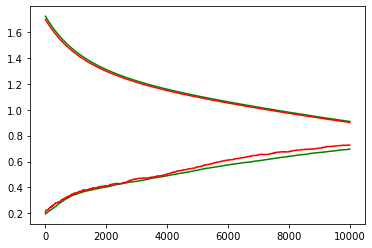

In [6]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['val_loss'],'r')
plt.plot(history.epoch, history.history['acc'],'g')
plt.plot(history.epoch, history.history['val_acc'],'r')
loss, accuracy = model.evaluate(xtest,ytest)
print(accuracy*100)